In [ ]:
#!pip install ydata-profiling


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport # Import from ydata_profiling instead of pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## EXPLORING DATA


In [ ]:
data = pd.read_csv("/content/mcdonalds.csv", skipinitialspace=True)

In [ ]:
# To get the column names
print(data.columns)

# To get the dimensions (rows, columns)
print(data.shape)

# To get a summary of specific columns (1, 2, 4, 5)
print(data.iloc[:, [0, 1, 3, 4]].describe())


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
       yummy convenient fattening greasy
count   1453       1453      1453   1453
unique     2          2         2      2
top      Yes        Yes       Yes    Yes
freq     803       1319      1260    765


In [ ]:
data.describe()  # Get descriptive statistics


Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000

In [ ]:
data.info()  # Get DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


## DATA CLEANING

In [ ]:
# Check for missing values
print(data.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Remove duplicates if necessary
data.drop_duplicates(inplace=True)


Number of duplicates: 22


In [ ]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of duplicates after removal: {data.duplicated().sum()}")


Number of duplicates after removal: 0


In [ ]:
# Convert 'Age' to numeric if it's stored as string (though it's likely correct already)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Check data types to ensure correctness
print(data.dtypes)


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [ ]:
# Example: Standardize 'Gender' column to lowercase 'male' or 'female'
data['Gender'] = data['Gender'].str.lower()

print(data['Gender'].unique())

['female' 'male']


In [ ]:
# Standardize the 'VisitFrequency' column values
data['VisitFrequency'] = data['VisitFrequency'].replace({'Daily': 'Every day', 'W': 'Weekly'})

# Check the unique values in 'VisitFrequency' to confirm
print(data['VisitFrequency'].unique())


['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']


## Descriptive Analysis

In [ ]:
summary_stats = data['Age'].describe()
print(summary_stats)

count    1431.000000
mean       44.656184
std        14.199400
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64


VISUALIZATION

In [ ]:
# automated comprehensive report

In [ ]:
# Generate a profile report
profile = ProfileReport(data, title='Data Visualization Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

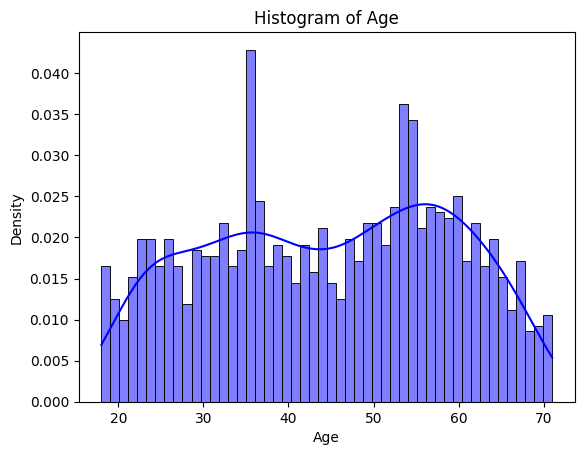

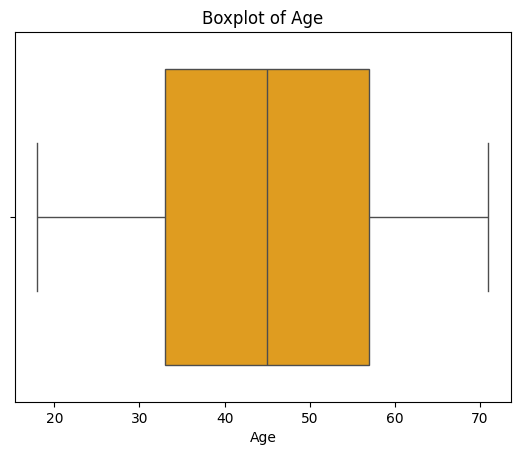

In [ ]:
# a) Numerical Columns

# Create a histogram for the 'Age' column
sns.histplot(data['Age'], bins=50, kde=True, stat="density", color="blue")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Histogram of Age")
plt.show()

# Boxplot for 'Age'
sns.boxplot(data=data, x='Age', color='orange')
plt.title('Boxplot of Age')
plt.show()

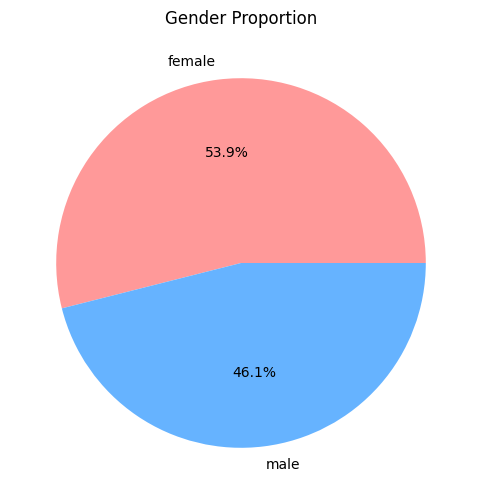

In [ ]:
# b) categorical column
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=['#ff9999','#66b3ff'])
plt.title('Gender Proportion')
plt.ylabel('')
plt.show()


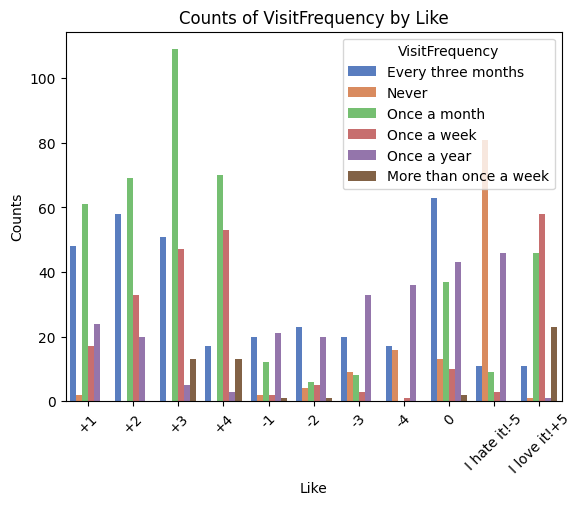

In [ ]:
grouped_data = data.groupby(['Like', 'VisitFrequency']).size().reset_index(name='Counts')

sns.barplot(data=grouped_data, x='Like', y='Counts', hue='VisitFrequency', palette='muted')
plt.title('Counts of VisitFrequency by Like')
plt.xlabel('Like')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


Label encoding

In [ ]:
#  1. Categorical Data Encoding:


# Label encoding for categorical columns (if necessary)
label_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

label_encoder = LabelEncoder()

# Apply Label Encoding
data_encoded = data.copy()
for col in label_columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

print(data_encoded.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  
0        0           0     6   61               0       0  
1        0           0     1   51               0       0  
2        1           0     0   62               0       0  
3        0           1     3   69               4       0  
4        1           0     1   49               3       1  


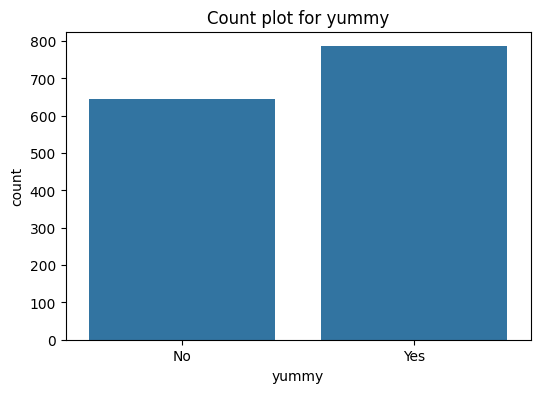

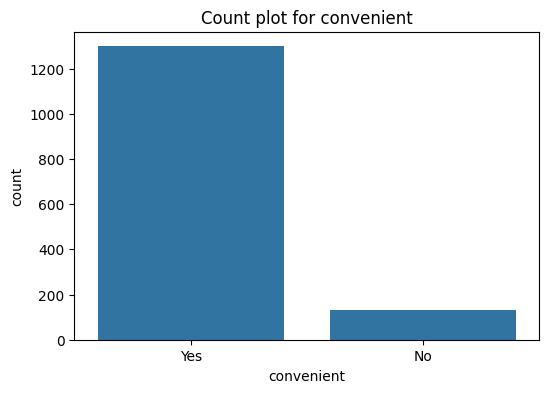

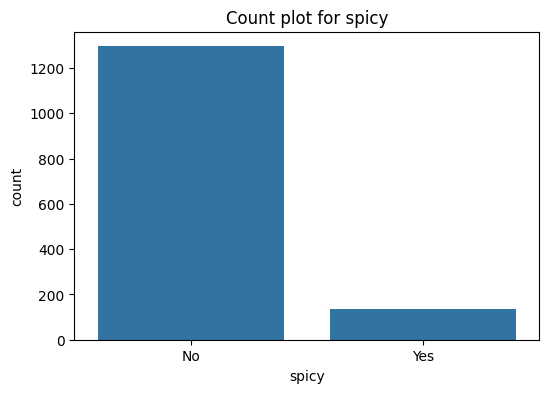

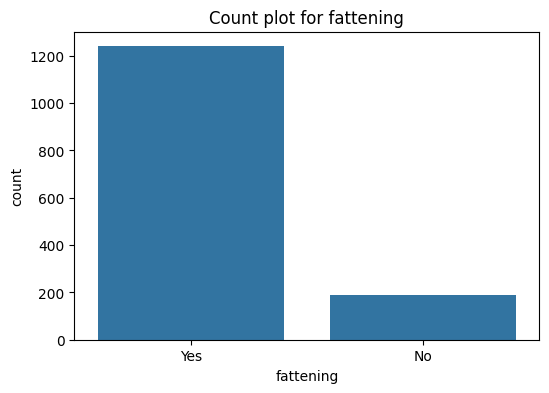

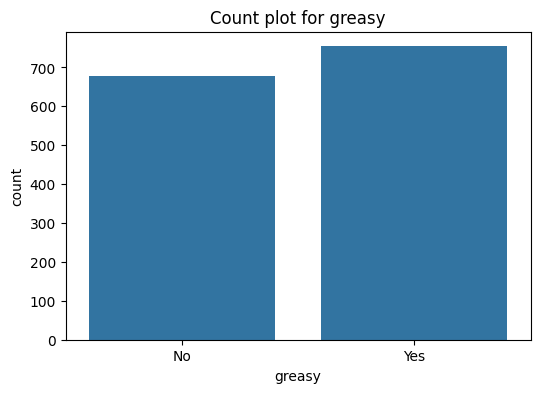

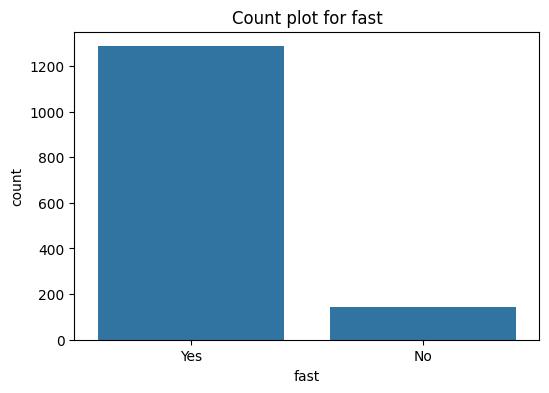

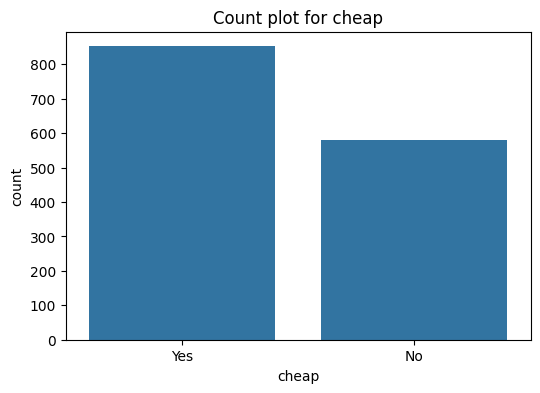

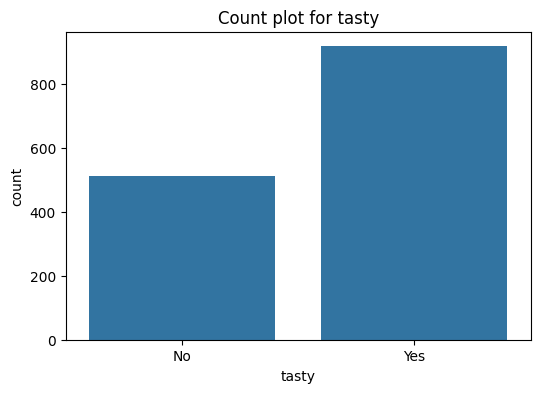

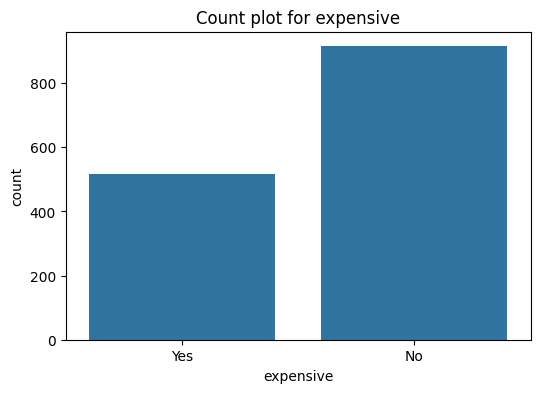

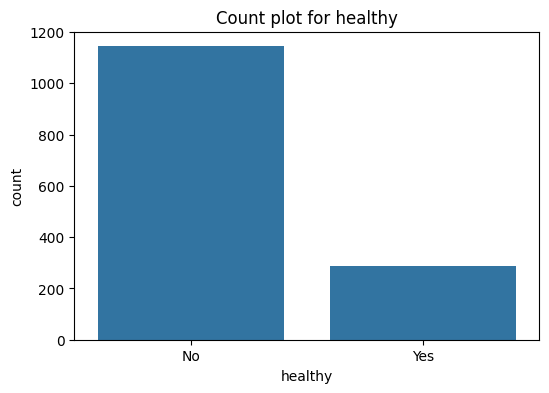

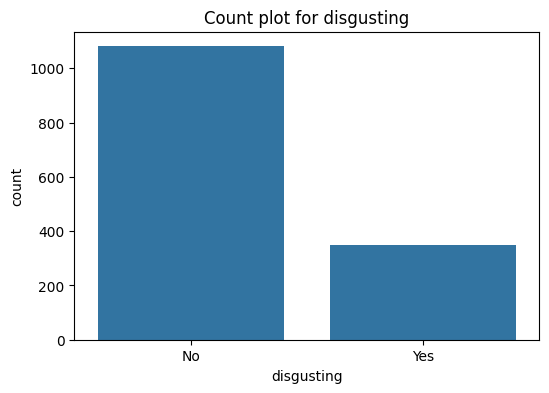

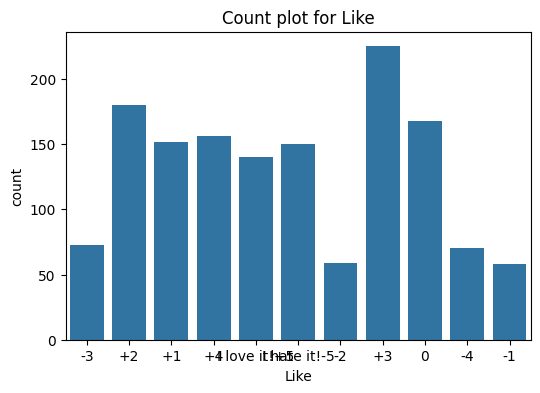

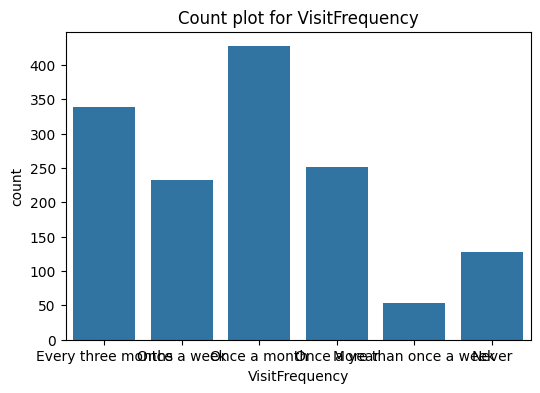

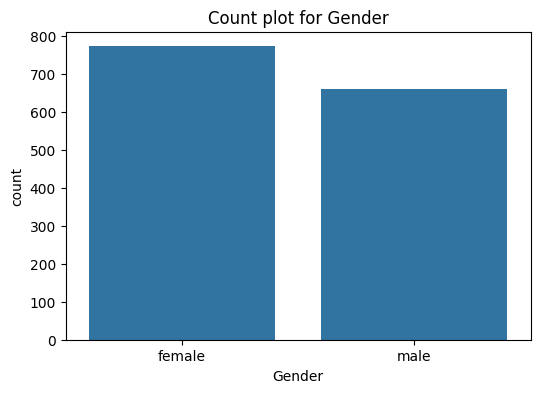

In [ ]:
# plots for categorical data

# Plot bar plots for categorical columns
for col in label_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Count plot for {col}')
    plt.show()


Handling Numerical Data

In [ ]:
# Apply RobustScaler
robust_scaler = RobustScaler()
data[numerical_columns] = robust_scaler.fit_transform(data[numerical_columns])

print(data.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like       Age      VisitFrequency  Gender  
0         No   -3  0.666667  Every three months  female  
1         No   +2  0.250000  Every three months  female  
2         No   +1  0.708333  Every three months  female  
3        Yes   +4  1.000000         Once a week  female  
4         No   +2  0.166667        Once a month    male  


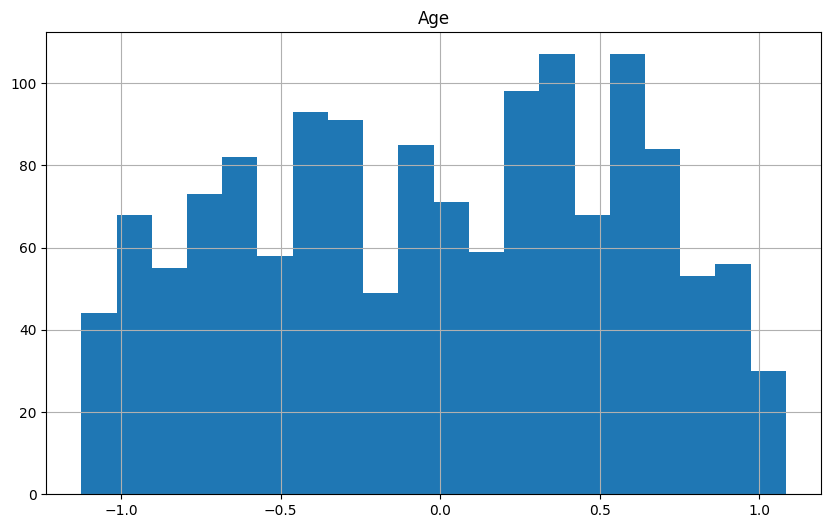

In [ ]:
# plot for numerical columns

# Plot histograms for numerical columns
data[numerical_columns].hist(bins=20, figsize=(10, 6))
plt.show()


## PCA

In [ ]:

data_scaled = StandardScaler().fit_transform(data_encoded)

# Assuming 'data_scaled' is the scaled version of your data (like 'vacmot' in R)
pca = PCA(n_components=15)  # You can adjust the number of components based on your requirement

# Fit and transform the data to get principal components
pca_result = pca.fit_transform(data_scaled)

# Print the explained variance ratio for each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

# You can also get the principal components (the loadings of the original features on each principal component)
print("Principal Components (Loadings):")
print(pca.components_)

# Now you have the PCA result in 'pca_result', which contains the transformed data in the new principal component space


Explained variance ratio: [0.19835649 0.11441938 0.10596325 0.07550012 0.07371756 0.06531414
 0.06465817 0.05839806 0.04903209 0.04562934 0.04049642 0.03642057
 0.03449384 0.02036688 0.0172337 ]
Cumulative explained variance: [0.19835649 0.31277587 0.41873912 0.49423924 0.5679568  0.63327094
 0.69792911 0.75632717 0.80535926 0.85098859 0.89148501 0.92790558
 0.96239942 0.9827663  1.        ]
Principal Components (Loadings):
[[ 4.04227358e-01  3.10192872e-01  1.20578559e-02 -1.41871682e-01
  -2.38492104e-01  1.99967625e-01  2.64859013e-01  4.22567873e-01
  -2.68784556e-01  2.37754742e-01 -4.06505433e-01 -2.61289085e-01
  -6.41865301e-02 -2.26151858e-02 -8.72109843e-02]
 [ 3.36305924e-01  5.95102259e-02 -2.76499246e-02  1.29580003e-01
   1.57827487e-01 -1.69466533e-01 -5.01394049e-01  2.85592352e-01
   5.30584887e-01 -3.23691651e-02 -9.59461157e-02 -1.76411952e-01
  -3.67397242e-01 -5.74819291e-02  1.34291221e-01]
 [ 1.71377155e-02  1.71312929e-01 -1.51316319e-01  5.45730472e-01
   4.225

In [ ]:
# Display PCA Summary

data_scaled = StandardScaler().fit_transform(data_encoded)
pca = PCA(n_components=15)  # You can adjust the number of components based on your requirement

# Fit and transform the data to get principal components
pca_result = pca.fit_transform(data_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_

# Standard deviation is the square root of the explained variance
std_dev = np.sqrt(explained_variance)

# Proportion of variance
variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of variance
cumulative_variance = np.cumsum(variance_ratio)

# Create a DataFrame to display the summary
summary_df = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': variance_ratio,
    'Cumulative Proportion': cumulative_variance
})

# Display the summary with rounded values
print(summary_df.round(2))


    Standard deviation  Proportion of Variance  Cumulative Proportion
0                 1.73                    0.20                   0.20
1                 1.31                    0.11                   0.31
2                 1.26                    0.11                   0.42
3                 1.06                    0.08                   0.49
4                 1.05                    0.07                   0.57
5                 0.99                    0.07                   0.63
6                 0.99                    0.06                   0.70
7                 0.94                    0.06                   0.76
8                 0.86                    0.05                   0.81
9                 0.83                    0.05                   0.85
10                0.78                    0.04                   0.89
11                0.74                    0.04                   0.93
12                0.72                    0.03                   0.96
13                0.

PCA visulization
- Plot the PCA result for components 2 and 3.
- Plot the projections of the data onto the 2nd and 3rd principal components.

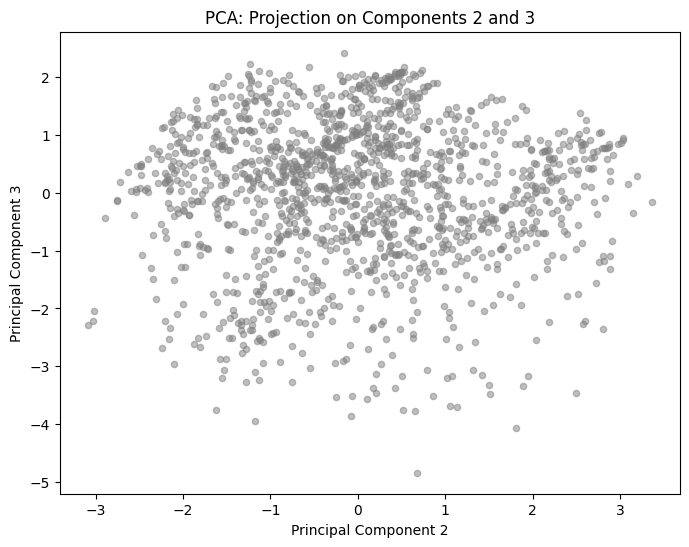

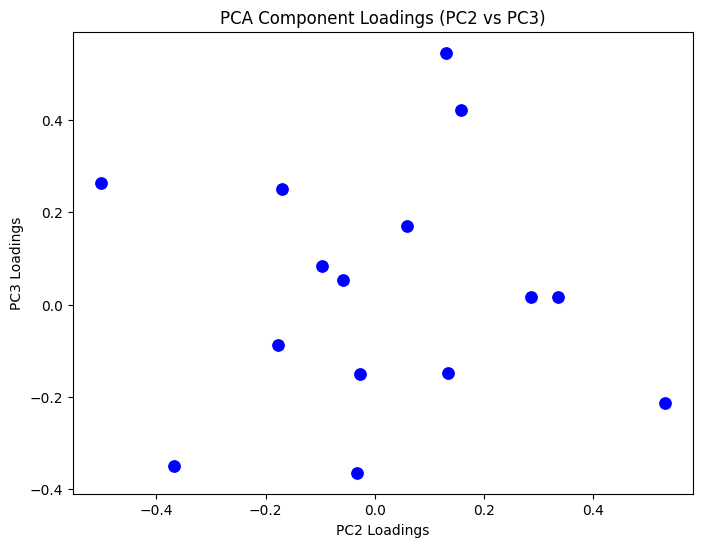

In [ ]:
# Initialize PCA and fit the scaled data
pca = PCA(n_components=3)  # We use 3 components to plot 2D projections from PCA
pca_result = pca.fit_transform(data_scaled)

# Plot the PCA results for components 2 and 3 (corresponding to PC2 and PC3 in your R code)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 1], pca_result[:, 2], color='grey', s=20, alpha=0.5)  # 2nd and 3rd components
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA: Projection on Components 2 and 3')
plt.show()

# Optional: Plot the PCA axes (i.e., directions of the components)
# We will plot the loadings of PC2 and PC3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca.components_[1, :], y=pca.components_[2, :], s=100, color='blue', marker='o')
plt.xlabel('PC2 Loadings')
plt.ylabel('PC3 Loadings')
plt.title('PCA Component Loadings (PC2 vs PC3)')
plt.show()

## Extracting Segments

In [ ]:
# Euclidean distance and Manhattan Distance
from scipy.spatial.distance import pdist, squareform

In [ ]:
# Convert categorical columns to numeric using simple encoding (Yes -> 1, No -> 0)
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
                       'expensive', 'healthy', 'disgusting']

data[categorical_columns] = data[categorical_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Now calculate Euclidean and Manhattan distances on the numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Euclidean Distance
euclidean_dist = pdist(numeric_data, metric='euclidean')
euclidean_dist_matrix = squareform(euclidean_dist)

# Manhattan Distance
manhattan_dist = pdist(numeric_data, metric='cityblock')
manhattan_dist_matrix = squareform(manhattan_dist)

# Display the distance matrices
print("Euclidean Distance Matrix:")
print(euclidean_dist_matrix)

print("\nManhattan Distance Matrix:")
print(manhattan_dist_matrix)

Euclidean Distance Matrix:
[[0.         1.78146319 2.23645615 ... 1.77218086 2.38630351 2.38084077]
 [1.78146319 0.         2.05184538 ... 1.41482724 2.04294178 2.40117159]
 [2.23645615 2.05184538 0.         ... 2.04294178 2.60108151 2.60341656]
 ...
 [1.77218086 1.41482724 2.04294178 ... 0.         2.05184538 2.41666667]
 [2.38630351 2.04294178 2.60108151 ... 2.05184538 0.         3.03480962]
 [2.38084077 2.40117159 2.60341656 ... 2.41666667 3.03480962 0.        ]]

Manhattan Distance Matrix:
[[0.         3.41666667 5.04166667 ... 3.375      5.83333333 5.29166667]
 [3.41666667 0.         4.45833333 ... 2.04166667 4.41666667 5.875     ]
 [5.04166667 4.45833333 0.         ... 4.41666667 6.875      6.33333333]
 ...
 [3.375      2.04166667 4.41666667 ... 0.         4.45833333 5.91666667]
 [5.83333333 4.41666667 6.875      ... 4.45833333 0.         9.45833333]
 [5.29166667 5.875      6.33333333 ... 5.91666667 9.45833333 0.        ]]


<ipython-input-142-3d1673fd489f>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[categorical_columns] = data[categorical_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


Hierarchical clustering method

In [ ]:
# Get the dimensions (rows, columns)
dimensions = data_encoded.shape
print(dimensions)

(1431, 15)


In [ ]:
# Calculate the mean of each column
column_means = data_encoded.mean()
print(column_means)

yummy              0.549266
convenient         0.907058
spicy              0.095038
fattening          0.866527
greasy             0.526904
fast               0.898672
cheap              0.595388
tasty              0.642208
expensive          0.360587
healthy            0.200559
disgusting         0.244584
Like               4.645003
Age               44.656184
VisitFrequency     2.640112
Gender             0.460517
dtype: float64


plotting dendogram

<ipython-input-145-675e80e55b4a>:11: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(manhattan_dist, method='complete')


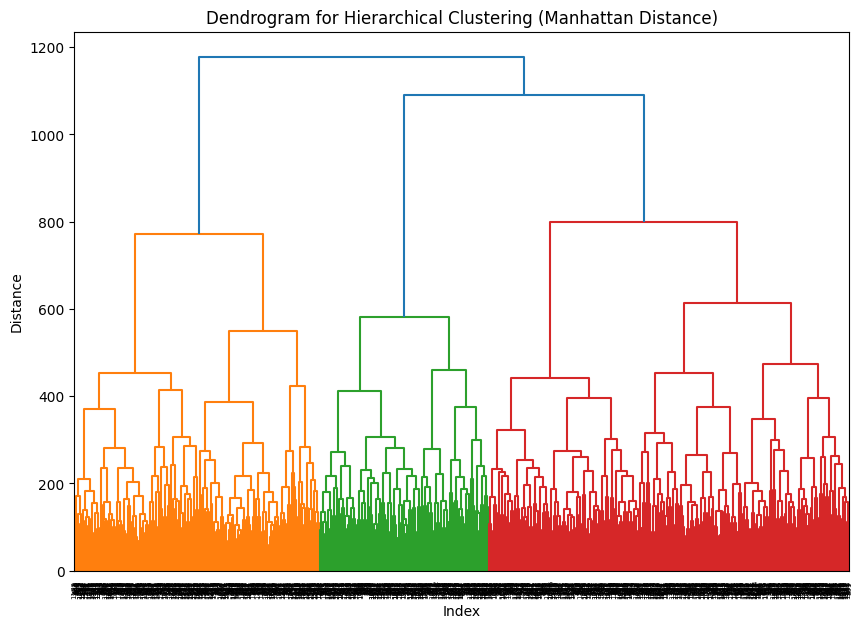

In [ ]:
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame
# Calculate Manhattan (Cityblock) distance matrix
manhattan_dist = cdist(data_encoded, data_encoded, metric='cityblock')

# Perform hierarchical clustering using complete linkage
linkage_matrix = linkage(manhattan_dist, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering (Manhattan Distance)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


In [ ]:
# cutting the hierarchical clustering tree into 6 clusters and calculating the mean of each feature per cluster


In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster
import numpy as np

# Assuming 'data_encoded' is your DataFrame and 'linkage_matrix' is the result from the previous clustering step

# Cut the hierarchical clustering tree into 6 clusters
clusters = fcluster(linkage_matrix, 6, criterion='maxclust')

# Add the cluster labels to the original dataframe
data_encoded['Cluster'] = clusters

# Calculate the mean of each feature per cluster
cluster_means = data_encoded.groupby('Cluster').mean()

# Round the means to 1 decimal place
cluster_means_rounded = cluster_means.round(1)

# Display the cluster means
print(cluster_means_rounded)


         yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
Cluster                                                                    
1          0.7         0.9    0.0        0.9     0.6   0.9    0.6    0.8   
2          0.8         0.9    0.1        0.9     0.8   0.9    0.6    0.8   
3          0.4         0.9    0.2        0.8     0.4   0.9    0.6    0.5   
4          0.4         0.9    0.1        0.8     0.4   0.9    0.6    0.6   
5          0.6         0.9    0.0        0.9     0.5   0.9    0.5    0.7   
6          0.4         0.9    0.1        0.9     0.5   0.9    0.5    0.6   

         expensive  healthy  disgusting  Like   Age  VisitFrequency  Gender  
Cluster                                                                      
1              0.4      0.2         0.2   4.4  32.0             3.0     0.5  
2              0.3      0.2         0.2   4.6  23.3             2.6     0.5  
3              0.3      0.2         0.3   5.4  63.1             2.6     0.5  
4

In [ ]:
# barchart for 6 clusters

<ipython-input-147-b4093b20a5e4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


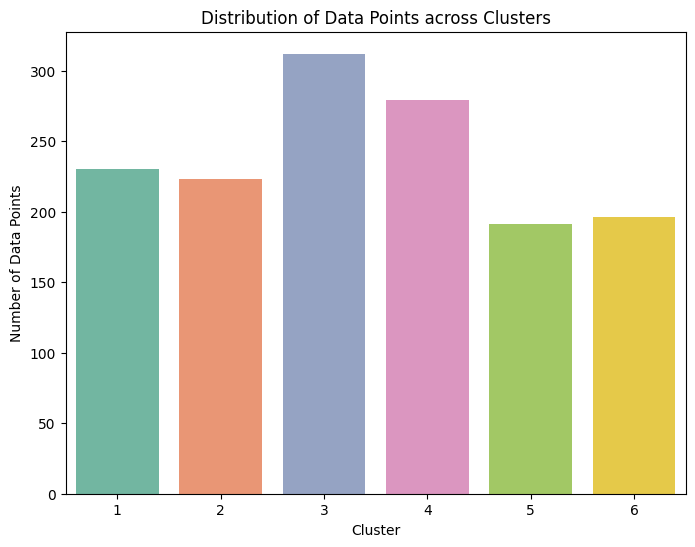

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'data_encoded' and 'clusters' are already defined
# 'clusters' is the array of cluster labels obtained after cutting the hierarchical tree

# Create a DataFrame with cluster labels
data_encoded['Cluster'] = clusters

# Calculate the count of data points in each cluster
cluster_counts = data_encoded['Cluster'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points across Clusters')
plt.show()


 partitioning clustering

In [ ]:
 ### k-Means and k-Centroid Clustering

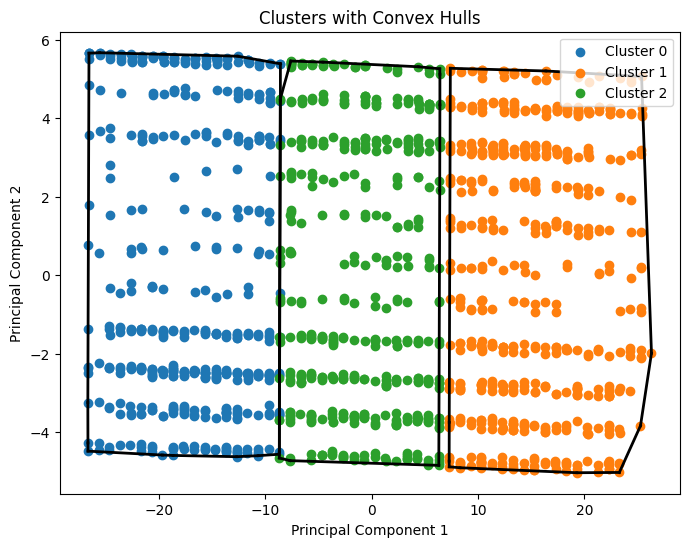

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# Assuming 'data_encoded' is your DataFrame with features already encoded
# Example: data_encoded = pd.read_csv('your_data.csv')  # Load your dataset if necessary

# 1. Preprocessing: Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns (like 'yummy', 'convenient', etc.) to numeric
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# 2. Perform KMeans clustering (e.g., 3 clusters, as in PF3.km3)
kmeans = KMeans(n_clusters=3, random_state=1234)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded)

# 3. Visualizing the clusters using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_encoded.drop(columns=['Cluster']))

# 4. Plotting the clusters and convex hulls
plt.figure(figsize=(8, 6))

# Loop through each cluster and plot the convex hull
for cluster_id in np.unique(data_encoded['Cluster']):
    # Get the points for the current cluster
    cluster_points = pca_data[data_encoded['Cluster'] == cluster_id]

    # Calculate the convex hull for the cluster
    hull = ConvexHull(cluster_points)

    # Plot the points of the cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

    # Plot the convex hull
    for simplex in hull.simplices:
        plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-', lw=2)

plt.title('Clusters with Convex Hulls')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Now,
- Perform KMeans clustering for k values from 2 to 8.
- Plot the inertia (sum of squared distances) for each k and choose the best number of clusters.
- Generate a bar chart showing the cluster distribution for a selected number of clusters (e.g., k = 2).

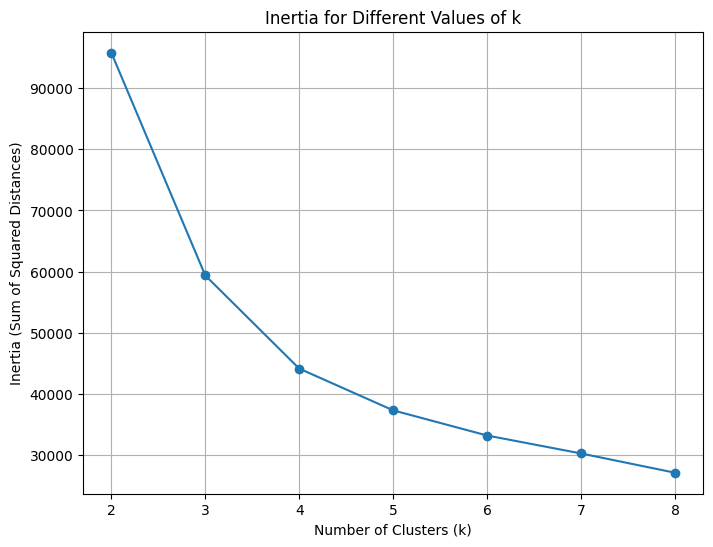

k = 2, Inertia = 95804.71275560248
k = 3, Inertia = 59360.19128581239
k = 4, Inertia = 44118.65461107011
k = 5, Inertia = 37287.690232555455
k = 6, Inertia = 33170.187739490924
k = 7, Inertia = 30233.523279370154
k = 8, Inertia = 27079.519787777353


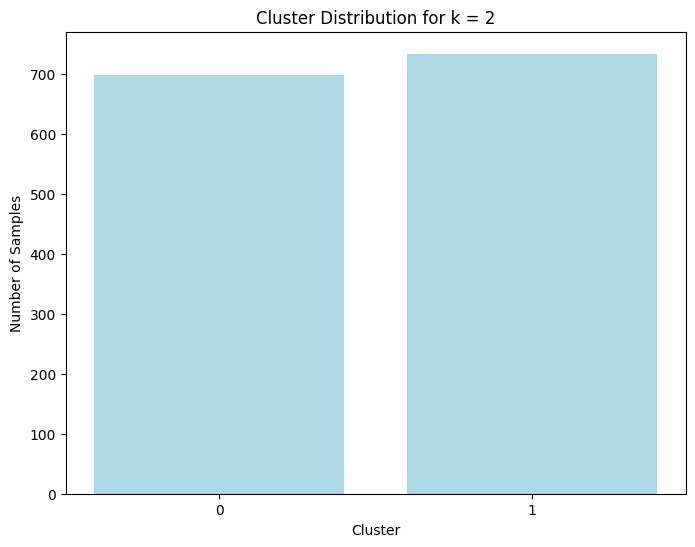

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame with features already encoded

# Preprocess the data (encode categorical features if any)
label_encoder = LabelEncoder()

for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# 1. Perform KMeans clustering for k = 2 to 8
inertia_values = []
k_range = range(2, 9)

# Store cluster assignments for each k
cluster_assignments = {}

# Iterate over the range of k and compute the inertia for each clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(data_encoded)
    inertia_values.append(kmeans.inertia_)
    cluster_assignments[k] = kmeans.labels_

# 2. Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Print inertia values for each k
for k, inertia in zip(k_range, inertia_values):
    print(f'k = {k}, Inertia = {inertia}')

# 3. Generate a bar chart for the cluster distribution for k = 2 (you can change this to any other k)
k_selected = 2  # Change this value for different cluster numbers
cluster_labels = cluster_assignments[k_selected]

# Create a bar chart showing the number of samples in each cluster
plt.figure(figsize=(8, 6))
plt.bar(range(k_selected), [sum(cluster_labels == i) for i in range(k_selected)], color='lightblue')
plt.title(f'Cluster Distribution for k = {k_selected}')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.xticks(range(k_selected))
plt.show()


 Self-Organising Maps

In [ ]:
#!pip install minisom

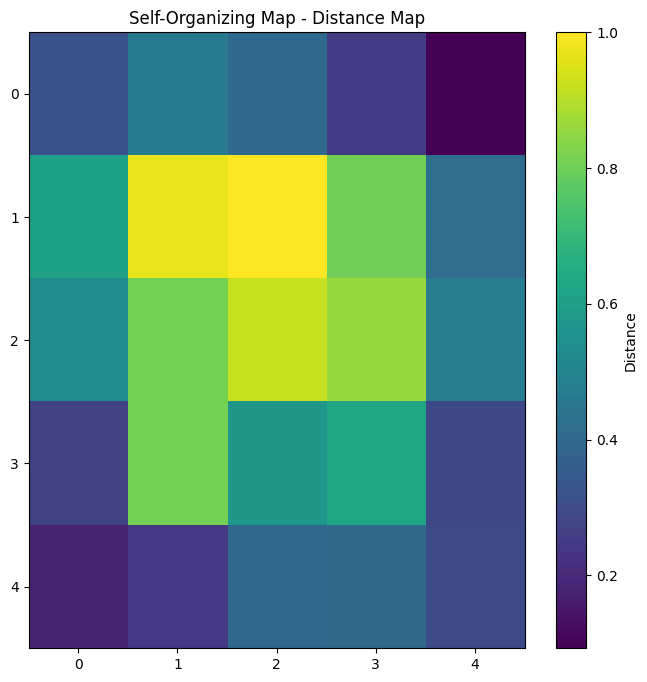

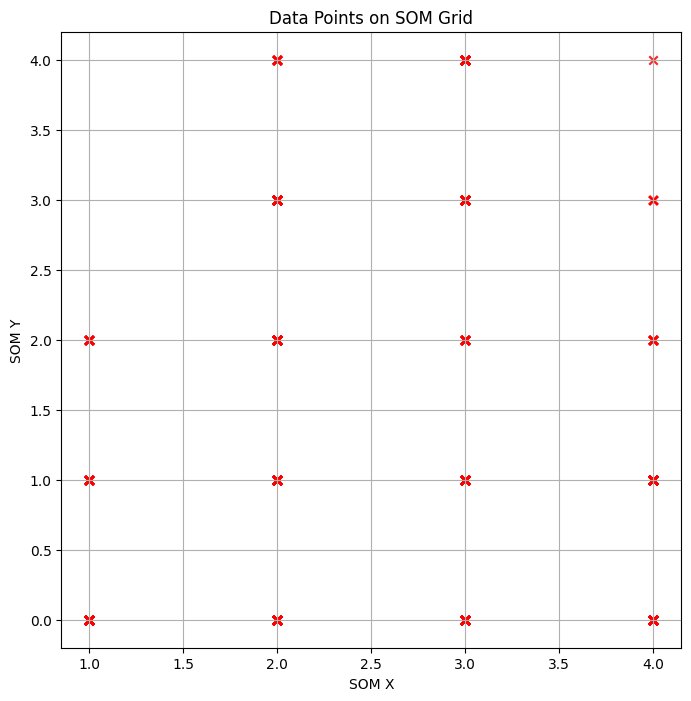

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_encoded' is your DataFrame with features already encoded

# Preprocess the data (encode categorical features if any)
label_encoder = LabelEncoder()

for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# 1. Create and fit a 5x5 Self-Organizing Map
som_size = (5, 5)  # 5x5 grid
som = MiniSom(x=som_size[0], y=som_size[1], input_len=data_encoded.shape[1], sigma=1.0, learning_rate=0.5, random_seed=1234)

# Train the SOM with the data
som.train_batch(data_encoded.values, num_iteration=100)

# 2. Plot the SOM map
# Get the distance map (for visualization)
distance_map = som.distance_map()

# Plotting the distance map with a colormap
plt.figure(figsize=(8, 8))
plt.imshow(distance_map, cmap='viridis', aspect='auto')
plt.colorbar(label='Distance')
plt.title('Self-Organizing Map - Distance Map')
plt.show()

# 3. Plot the data points on the SOM grid (to visualize clusters)
# Get the cluster assignments (winning neuron)
win_map = np.array([som.winner(x) for x in data_encoded.values])

# Plot the data points on the SOM grid
plt.figure(figsize=(8, 8))
plt.scatter(win_map[:, 0], win_map[:, 1], c='red', marker='x', alpha=0.6)
plt.title('Data Points on SOM Grid')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(True)
plt.show()


 Two-Step Clustering

- Perform K-Means Clustering (to get the initial clusters).
- Hierarchical Clustering (based on cluster centroids).
- Extract Segments (using a two-step process)

Segment Sizes:
1    15
2     6
3     9
Name: count, dtype: int64
Number of data points: 1431


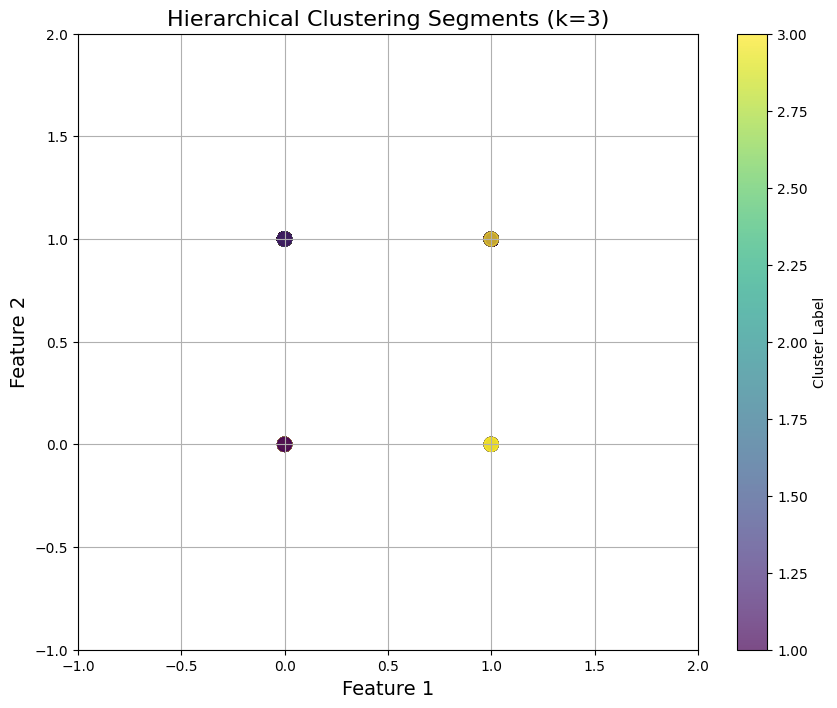

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import LabelEncoder

# Assuming 'data_encoded' is your DataFrame with features already encoded

# 1. Apply K-means to extract k=30 clusters
k = 30
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(data_encoded)  # Fit the KMeans model to your data

# 2. Get the cluster centers (representative members of each cluster)
cluster_centers = kmeans.cluster_centers_

# 3. Perform Hierarchical Clustering based on cluster centers
Z = linkage(cluster_centers, method='complete', metric='euclidean')

# 4. Define the sizes of the clusters from K-means (number of points in each cluster)
sizes = pd.Series(kmeans.labels_).value_counts().sort_index()

# 5. Cut the dendrogram to get 3 clusters (equivalent to twoStep in R)
PF3_ts3 = fcluster(Z, t=3, criterion='maxclust')

# 6. Display the size of each cluster (similar to the R table output)
segment_sizes = pd.Series(PF3_ts3).value_counts().sort_index()
print("Segment Sizes:")
print(segment_sizes)

# 7. Ensure that PF3_ts3 is the correct size (same number of points as data_encoded)
print(f"Number of data points: {data_encoded.shape[0]}")

# If PF3_ts3 has fewer elements, ensure the correct matching
cluster_labels = np.array([PF3_ts3[i % len(PF3_ts3)] for i in range(data_encoded.shape[0])])

# 8. Plot the result (to visualize the segments)
plt.figure(figsize=(10, 8))

# Scatter plot with increased point size (s) and transparency (alpha)
scatter = plt.scatter(data_encoded.iloc[:, 0], data_encoded.iloc[:, 1], c=cluster_labels, cmap='viridis', s=100, alpha=0.7)

# Add color bar to show cluster mapping
plt.colorbar(scatter, label='Cluster Label')

# Title and axis labels
plt.title('Hierarchical Clustering Segments (k=3)', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Optionally, adjust axis limits for better visualization
plt.xlim([data_encoded.iloc[:, 0].min() - 1, data_encoded.iloc[:, 0].max() + 1])
plt.ylim([data_encoded.iloc[:, 1].min() - 1, data_encoded.iloc[:, 1].max() + 1])

plt.grid(True)
plt.show()


In [ ]:
data_encoded.shape

(1431, 16)

Bagged Clustering

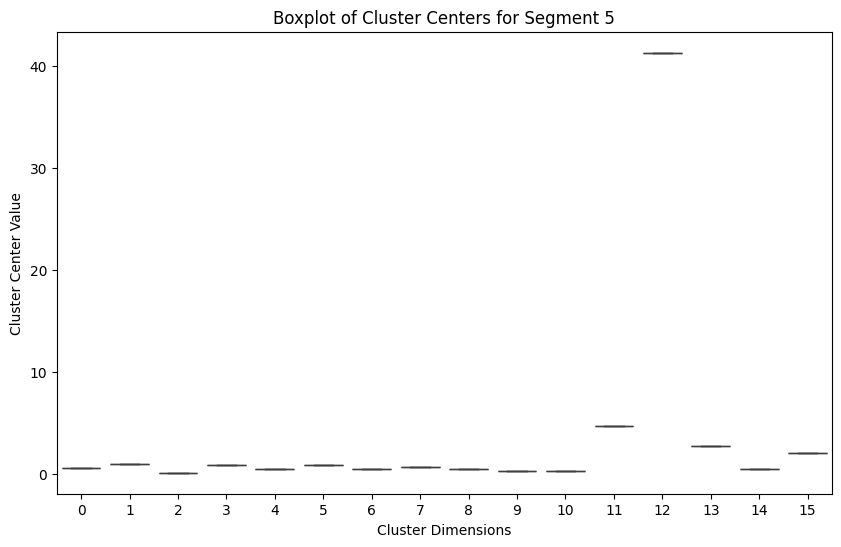

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_encoded' is your dataset
# Perform bagging by creating bootstrap samples
n_clusters = 5  # Define number of clusters
n_estimators = 100  # Number of bagging iterations

cluster_centers_list = []  # To store cluster centers from each bagging iteration

# Perform bagging clustering
for _ in range(n_estimators):
    # Create a bootstrap sample (resampling with replacement)
    data_resampled = resample(data_encoded, replace=True, n_samples=len(data_encoded), random_state=42)

    # Apply KMeans clustering on the resampled data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_resampled)

    # Store the cluster centers
    cluster_centers_list.append(kmeans.cluster_centers_)

# Convert the list of cluster centers into a numpy array
cluster_centers_array = np.array(cluster_centers_list)

# Extract the cluster centers corresponding to the segment 5 (assuming segment 5 is the 5th cluster)
segment_5_centers = cluster_centers_array[:, 4, :]  # Segment 5 corresponds to the 5th cluster (index 4)

# Create a DataFrame for visualization (flatten the centers to 1D for each dimension)
segment_5_centers_df = pd.DataFrame(segment_5_centers)

# Plotting the boxplot for segment 5 cluster centers
plt.figure(figsize=(10, 6))
sns.boxplot(data=segment_5_centers_df)
plt.title('Boxplot of Cluster Centers for Segment 5')
plt.xlabel('Cluster Dimensions')
plt.ylabel('Cluster Center Value')
plt.show()


Model-Based Methods

Best GMM model has 8 components.
Means of the components: [[ 0.90587565  0.32010206 -0.18198973  0.39246944  0.27993035  0.18044918
   0.60152208  0.65948642 -0.75095568  0.00640817 -0.36302437 -0.15099546
  -1.23140494  0.04757041 -0.19246859 -1.24875923]
 [-1.10390428  0.32010206 -0.09193532  0.39246944  0.22841074  0.33578672
   0.52779188 -1.0459736  -0.75095568 -0.33090336  0.40071761  0.19263895
   0.17156505  0.10255375 -0.07606321  0.00599557]
 [ 0.42443418  0.32010206  0.05348993  0.39246944 -0.37283056  0.33578672
   0.62297129  0.74640961 -0.75095568  0.01538583 -0.49171706 -0.40555617
   0.53298675 -0.08669569 -0.1192985   0.58366707]
 [ 0.70175747 -0.19113216 -0.0310328   0.39246944  0.41554345 -0.15611542
  -0.79920414  0.45304394  1.33163652  0.00640821 -0.02375127 -0.16687539
  -1.19159329  0.07121001  0.11056097 -1.24875923]
 [-0.83945953 -3.1240036  -0.05486815 -0.20077689  0.29749971 -0.79790485
  -0.40881038 -0.99205417  0.38168226 -0.30371133  1.10439608  0.8366580

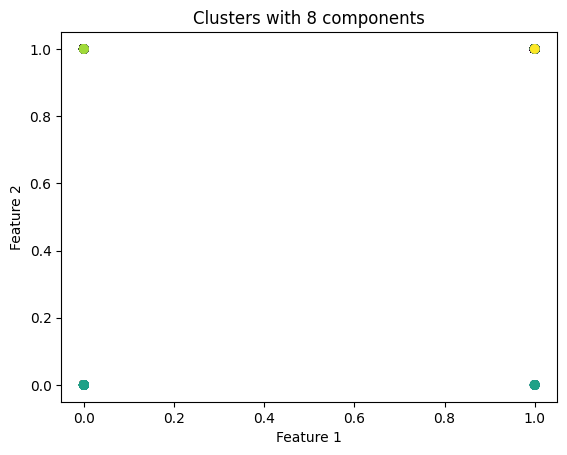

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming data_encoded is a Pandas DataFrame
# You should replace the synthetic data with your actual data (data_encoded)

# Standardize the data (optional but recommended for GMMs)
scaler = StandardScaler()
data_encoded_scaled = scaler.fit_transform(data_encoded)

# Fit Gaussian Mixture Models (GMM) for 2 to 8 clusters (equivalent to G=2:8)
gmm_models = []
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(data_encoded_scaled)
    gmm_models.append(gmm)

# Choose the best model based on BIC (Bayesian Information Criterion)
bic_scores = [model.bic(data_encoded_scaled) for model in gmm_models]
best_model_index = np.argmin(bic_scores)
best_gmm = gmm_models[best_model_index]

# Display the best model
print(f"Best GMM model has {best_gmm.n_components} components.")
print("Means of the components:", best_gmm.means_)
print("Covariances of the components:", best_gmm.covariances_)

# Predict the cluster labels for the data
labels = best_gmm.predict(data_encoded_scaled)

# Add the labels to the original data (optional)
data_encoded_with_labels = data_encoded.copy()
data_encoded_with_labels['Cluster'] = labels

# Plotting the clusters (if your data has 2 or 3 dimensions, adjust as needed)
# For 2D or 3D visualization (choose the first two or three features for plotting)
plt.scatter(data_encoded_with_labels.iloc[:, 0], data_encoded_with_labels.iloc[:, 1], c=data_encoded_with_labels['Cluster'], cmap='viridis')
plt.title(f'Clusters with {best_gmm.n_components} components')
plt.xlabel('Feature 1')  # Replace with actual column names
plt.ylabel('Feature 2')  # Replace with actual column names
plt.show()


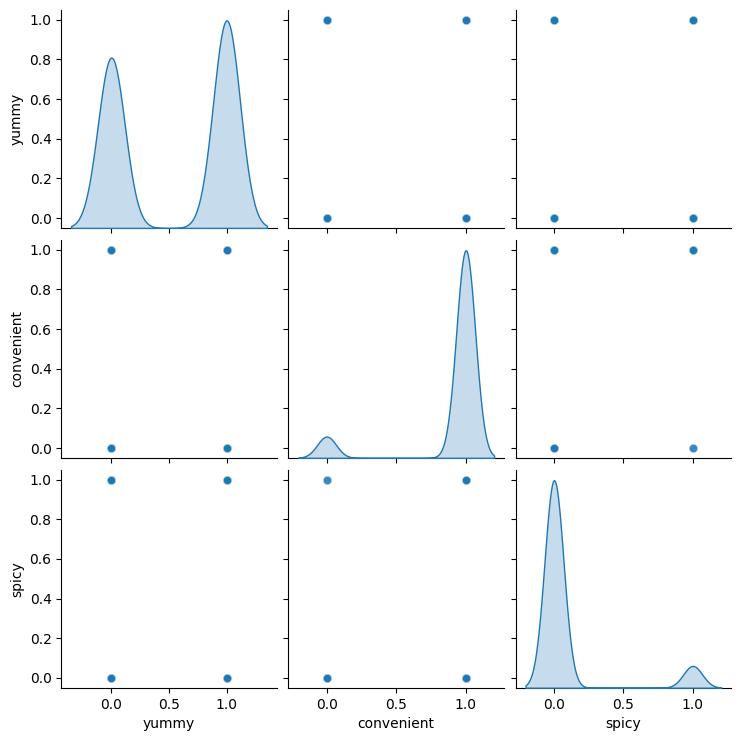

Best model has 8 components, based on BIC.


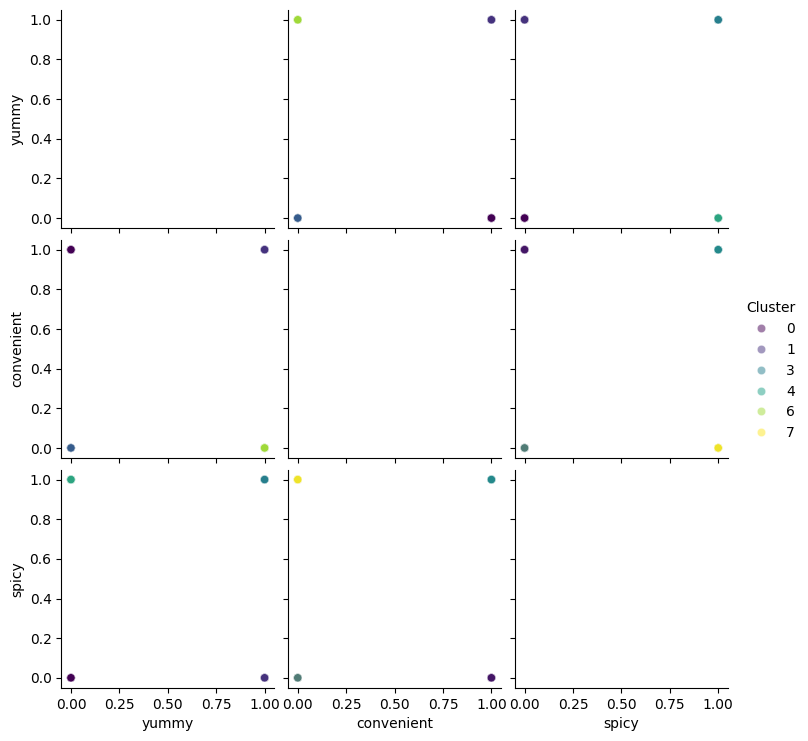

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is your DataFrame, and we are interested in the following columns:
# Select columns similar to the R code example, adapt to your actual dataset
columns_of_interest = ['yummy', 'convenient', 'spicy']  # Replace with relevant columns from your dataset
vacmet = data_encoded[columns_of_interest].dropna()  # Drop rows with missing values

# Visualize the data using a pairplot (similar to R's pairs function)
sns.pairplot(vacmet, plot_kws={'alpha': 0.2}, diag_kind='kde', markers='o')
plt.show()

# Fit a Gaussian Mixture Model (GMM) with different covariance models (similar to Mclust in R)
# We use G=1:8 as in the R example to try 1 to 8 components
gmm_models = {}
bic_scores = []

# Standardize the data
scaler = StandardScaler()
vacmet_scaled = scaler.fit_transform(vacmet)

# Fit GMM for different numbers of components (G = 1 to 8)
for n_components in range(1, 9):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(vacmet_scaled)
    gmm_models[n_components] = gmm
    bic_scores.append(gmm.bic(vacmet_scaled))

# Find the best model based on BIC
best_n_components = np.argmin(bic_scores) + 1  # Add 1 to get the correct component number (since indexing starts from 0)
best_gmm = gmm_models[best_n_components]

print(f"Best model has {best_n_components} components, based on BIC.")

# Visualize the results
labels = best_gmm.predict(vacmet_scaled)

# Add predicted labels to the data for visualization
vacmet['Cluster'] = labels

# Plot the clusters
sns.pairplot(vacmet, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5}, diag_kind='kde', markers='o')
plt.show()


Normal Distributions


fitting the Gaussian Mixture Models with different covariance matrix types and selecting the best model based on BIC.

Fitting GMM with covariance type: full
Fitting GMM with covariance type: tied
Fitting GMM with covariance type: diag
Fitting GMM with covariance type: spherical
Best model: Covariance Type = diag, Components = 8, BIC = -9760.848019463287


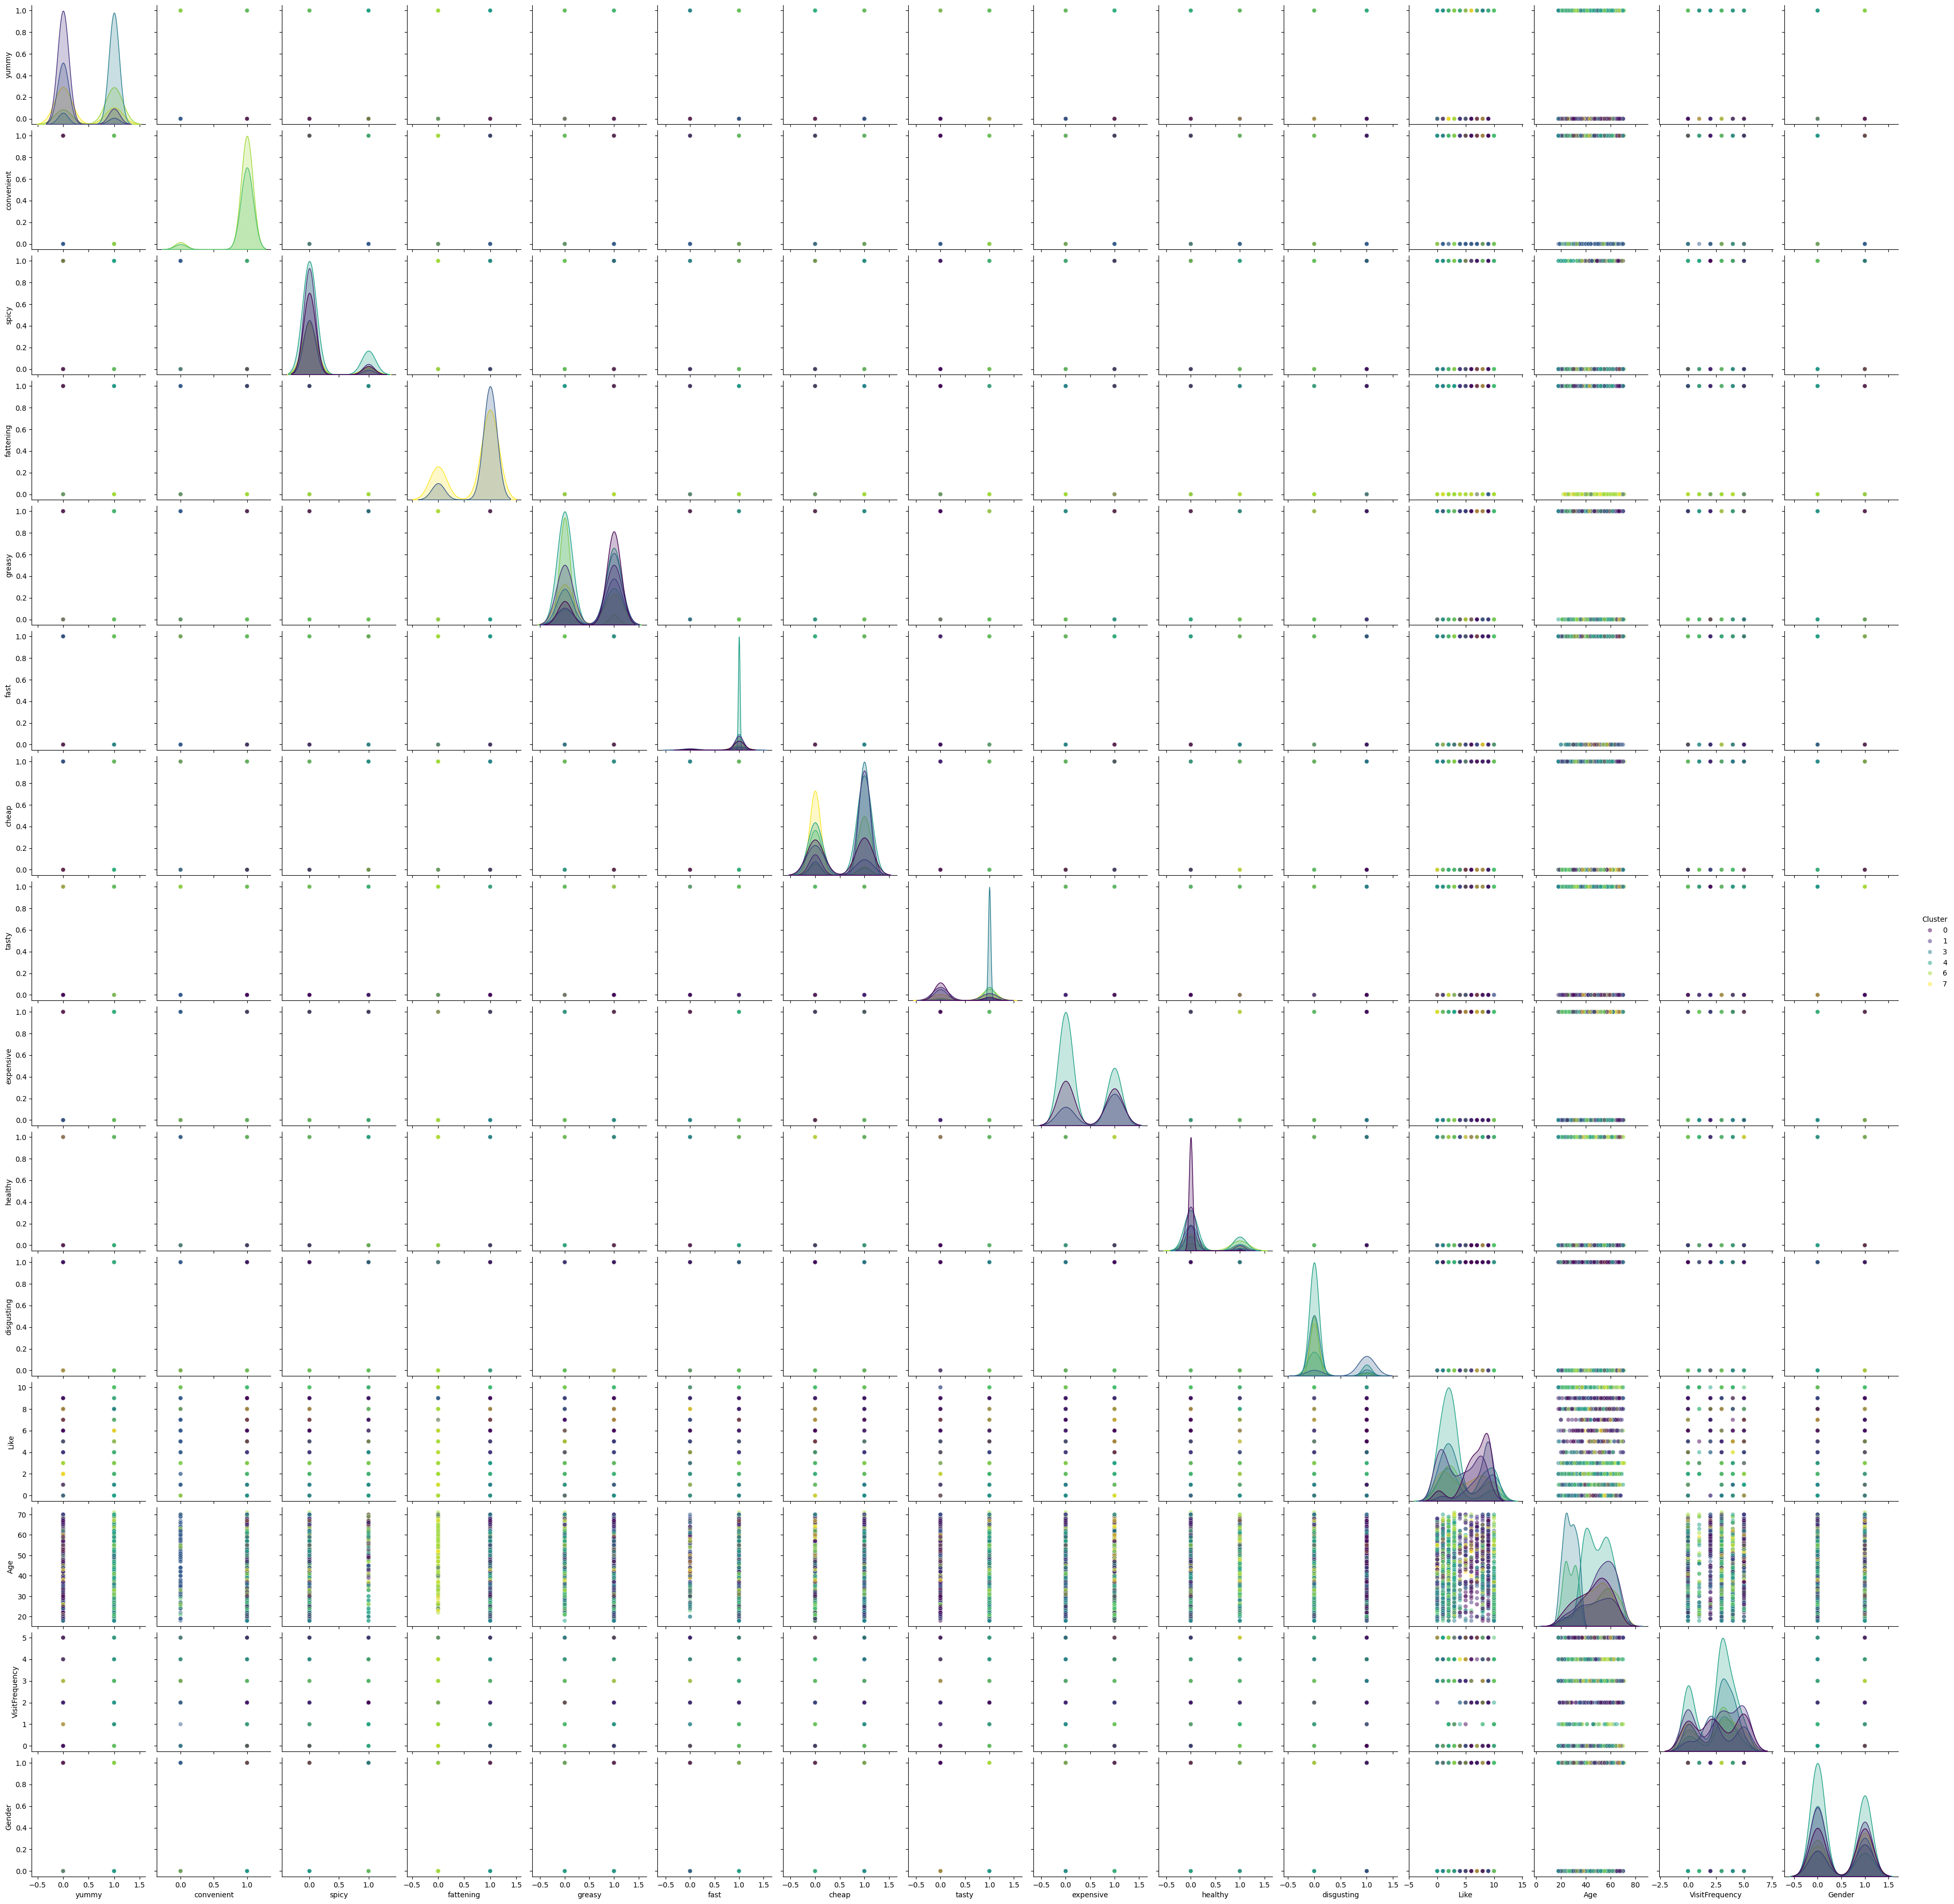

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame
vacmet = data_encoded.dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
vacmet_scaled = scaler.fit_transform(vacmet)

# Define the covariance types to test (equivalent to "modelNames" in Mclust)
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Fit GMM for different covariance types and number of components (G=1 to 8)
gmm_models = {}
bic_scores = []

for cov_type in covariance_types:
    print(f"Fitting GMM with covariance type: {cov_type}")

    # Fit GMM with G=1 to 8 for each covariance type
    for n_components in range(1, 9):
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
        gmm.fit(vacmet_scaled)

        # Store the models and BIC scores
        gmm_models[(cov_type, n_components)] = gmm
        bic_scores.append((cov_type, n_components, gmm.bic(vacmet_scaled)))

# Find the best model based on the lowest BIC score
best_bic_model = min(bic_scores, key=lambda x: x[2])
best_cov_type, best_n_components, best_bic = best_bic_model

# Print the best model and BIC score
print(f"Best model: Covariance Type = {best_cov_type}, Components = {best_n_components}, BIC = {best_bic}")

# Get the best model
best_gmm = gmm_models[(best_cov_type, best_n_components)]

# Predict the clusters using the best model
labels = best_gmm.predict(vacmet_scaled)

# Add predicted labels to the original data for visualization
vacmet['Cluster'] = labels

# Visualize the clusters using a pairplot
sns.pairplot(vacmet, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5}, diag_kind='kde', markers='o')
plt.show()


VSBD

Selected features: Index(['convenient', 'spicy', 'fattening', 'fast', 'tasty', 'healthy'], dtype='object')


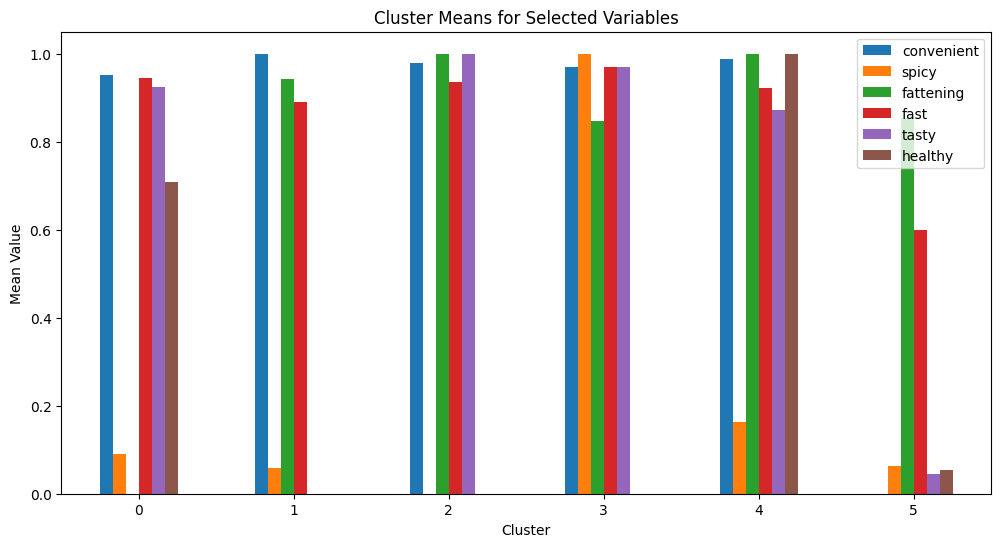

Silhouette Score: 0.6706555840858466


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score

# Load your data (assuming 'data_encoded' is a DataFrame)
# data_encoded = pd.read_csv('data_encoded.csv') # If you have a dataset file

# Step 1: Feature Selection using RFE (Recursive Feature Elimination)
# We'll select the top 6 features for clustering
X = data_encoded  # Assuming data_encoded contains the full dataset
y = np.random.choice([0, 1], size=X.shape[0])  # Dummy target for RFE; replace with your actual target if available

# Using Logistic Regression as the model for RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=6)
fit = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[fit.support_]
print("Selected features:", selected_features)

# Step 2: Clustering using KMeans
# Select only the variables chosen by RFE for clustering
X_selected = X[selected_features]

# Apply KMeans clustering with 6 clusters (as in the R example)
kmeans = KMeans(n_clusters=6, random_state=1234, n_init=50)
kmeans.fit(X_selected)

# Add cluster labels to the original data
data_encoded['Cluster'] = kmeans.labels_

# Step 3: Visualizing Cluster Centers (Bar Chart of Cluster Means)
# Calculate the mean of each variable in each cluster
cluster_means = data_encoded.groupby('Cluster')[selected_features].mean()

# Plot the bar chart of cluster means
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Means for Selected Variables')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

# Step 4: Optional: Evaluate clustering quality with silhouette score
silhouette_avg = silhouette_score(X_selected, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Gorge Plots

Selected features: Index(['convenient', 'fattening', 'greasy', 'fast', 'expensive', 'healthy'], dtype='object')


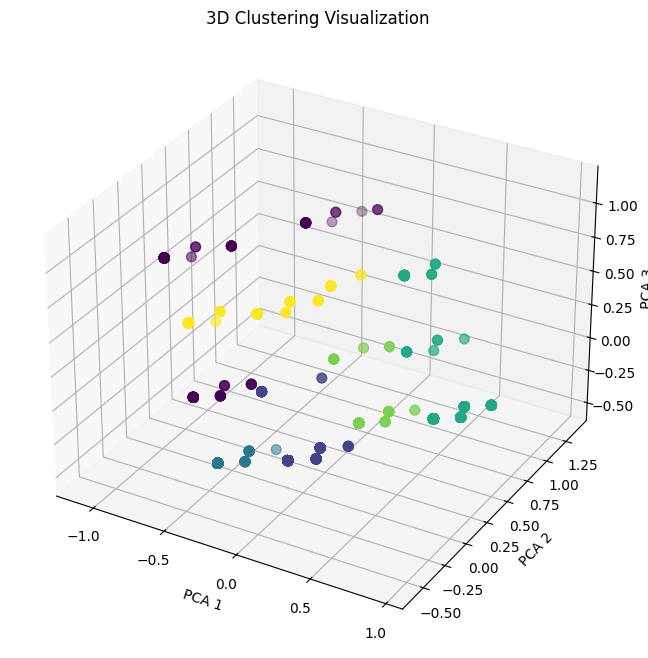

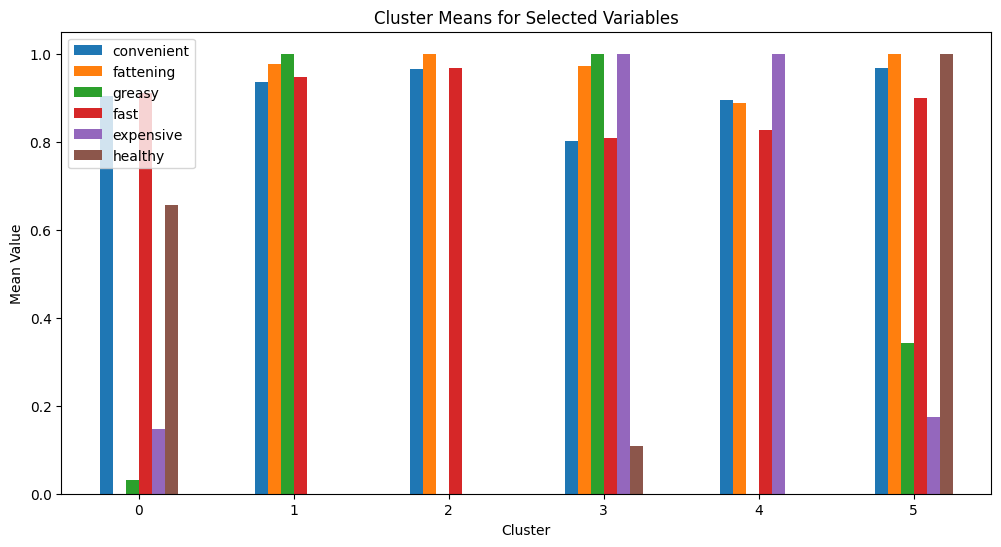

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data_encoded' is your dataset

# Step 1: Feature Selection using RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_encoded  # Assuming your data_encoded is the full dataset
y = np.random.choice([0, 1], size=X.shape[0])  # Dummy target for RFE; replace with your actual target if available

# Using Logistic Regression as the model for RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=6)
fit = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[fit.support_]
print("Selected features:", selected_features)

# Step 2: Clustering using KMeans
X_selected = X[selected_features]  # Select only the variables chosen by RFE

# Apply KMeans clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=1234, n_init=50)
kmeans.fit(X_selected)

# Add cluster labels to the original data
data_encoded['Cluster'] = kmeans.labels_

# Step 3: Visualizing the Clusters

# 3D Scatter Plot of the clusters (if there are at least 3 selected features)
if X_selected.shape[1] >= 3:
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_selected)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data_encoded['Cluster'], cmap='viridis', s=50)

    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    ax.set_title('3D Clustering Visualization')
    plt.show()

# 2D Pair Plot if there are fewer than 3 features selected
else:
    sns.pairplot(data_encoded, hue='Cluster', vars=selected_features, palette='viridis')
    plt.suptitle('Pairwise Feature Distribution by Clusters', y=1.02)
    plt.show()

# Step 4: Optional - Visualize Cluster Centers (Bar Chart of Means)
cluster_means = data_encoded.groupby('Cluster')[selected_features].mean()

# Plot the bar chart of cluster means
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Means for Selected Variables')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()


global stability analysis

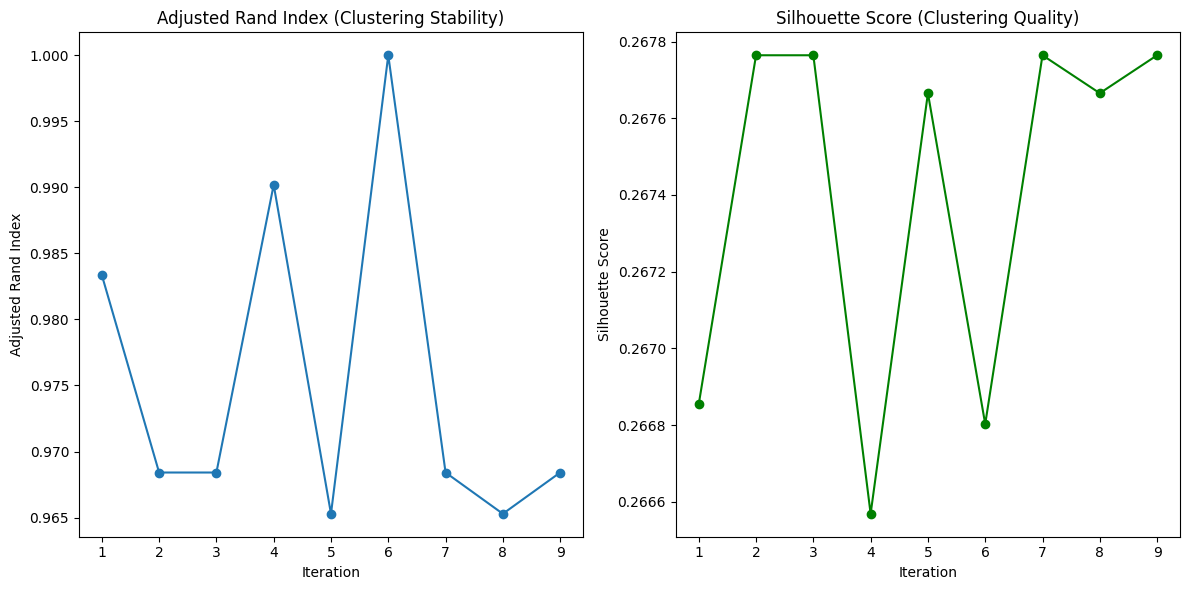

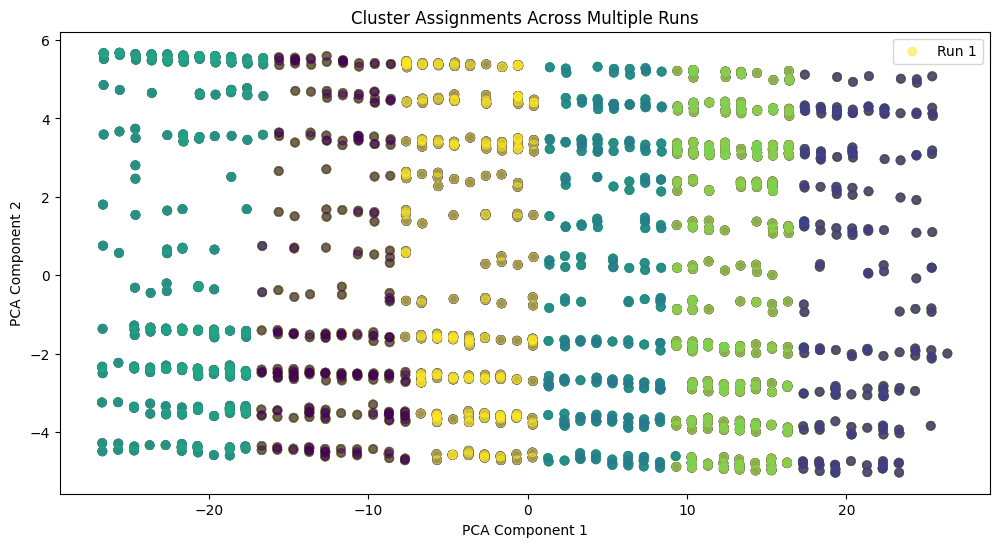

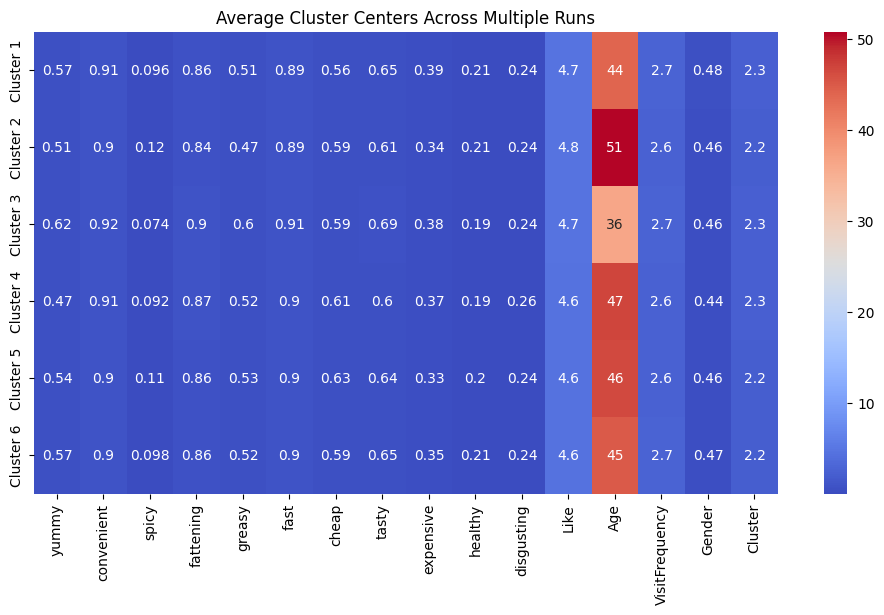

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming 'data_encoded' is your dataset and contains the columns you mentioned.

# Step 1: Perform Clustering Multiple Times to Measure Stability
num_clusters = 6
num_iterations = 10  # Number of different initializations for stability analysis

# Store results of multiple clustering runs
stability_results = []

# Perform KMeans clustering with different initializations
for i in range(num_iterations):
    kmeans = KMeans(n_clusters=num_clusters, random_state=i, n_init=50)
    kmeans.fit(data_encoded)
    stability_results.append(kmeans.labels_)

# Step 2: Evaluate Stability (e.g., Adjusted Rand Index, Silhouette Score)
adjusted_rand_indices = []
silhouette_scores = []

for i in range(1, num_iterations):
    ari = adjusted_rand_score(stability_results[0], stability_results[i])  # Compare all runs to the first one
    adjusted_rand_indices.append(ari)

    # Silhouette score for each clustering run
    silhouette = silhouette_score(data_encoded, stability_results[i])
    silhouette_scores.append(silhouette)

# Step 3: Plot Stability Evaluation Metrics
plt.figure(figsize=(12, 6))

# Plot Adjusted Rand Index
plt.subplot(1, 2, 1)
plt.plot(range(1, num_iterations), adjusted_rand_indices, marker='o')
plt.title('Adjusted Rand Index (Clustering Stability)')
plt.xlabel('Iteration')
plt.ylabel('Adjusted Rand Index')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(1, num_iterations), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score (Clustering Quality)')
plt.xlabel('Iteration')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Step 4: Visualize Stability by Plotting Clustering Assignments
# Perform PCA for 2D visualization of clustering results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_encoded)

# Visualize clusters across different runs
plt.figure(figsize=(12, 6))
for i in range(num_iterations):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=stability_results[i], cmap='viridis', label=f'Run {i+1}' if i == 0 else "", alpha=0.5)

plt.title('Cluster Assignments Across Multiple Runs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Step 5: Cluster Centers Across Runs (Optional)
# Average cluster centers for comparison (show how they change across runs)
cluster_centers_all = np.array([KMeans(n_clusters=num_clusters, random_state=i, n_init=50).fit(data_encoded).cluster_centers_ for i in range(num_iterations)])

# Plot the average cluster centers (feature means for the selected clusters)
avg_cluster_centers = np.mean(cluster_centers_all, axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(avg_cluster_centers, annot=True, cmap="coolwarm", xticklabels=data_encoded.columns, yticklabels=[f'Cluster {i+1}' for i in range(num_clusters)])
plt.title('Average Cluster Centers Across Multiple Runs')
plt.show()



 Segment Level Stability Within Solutions (SLSW)

Average Adjusted Rand Index: -0.0001
Standard Deviation of ARI: 0.0010


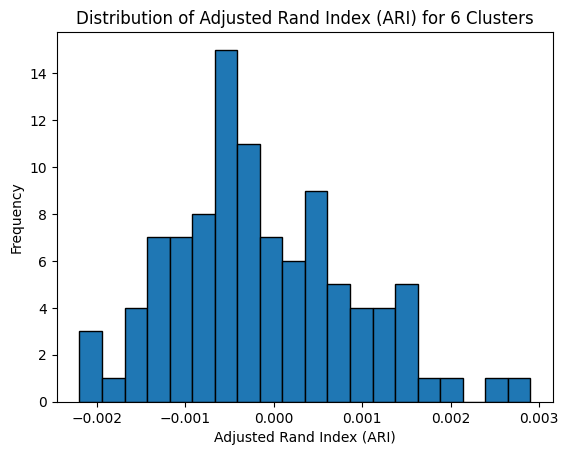

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

# Assuming 'data_encoded' is your dataset (similar to PF3 in R)

def slsw_stability_analysis(data, n_clusters, n_bootstrap=100):
    """
    Perform Segment-Level Stability Within Solutions (SLSW) on the given dataset.

    Parameters:
    - data: The dataset to analyze.
    - n_clusters: Number of clusters to use in KMeans.
    - n_bootstrap: Number of bootstrap iterations to run.

    Returns:
    - stability_scores: List of Adjusted Rand Index scores for each bootstrap iteration.
    """
    stability_scores = []

    # Perform KMeans clustering on the original data
    kmeans_original = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_original.fit(data)
    original_labels = kmeans_original.labels_

    # Bootstrap sampling and clustering
    for i in range(n_bootstrap):
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = resample(data, random_state=i)

        # Perform KMeans clustering on the bootstrap sample
        kmeans_bootstrap = KMeans(n_clusters=n_clusters, random_state=i)
        kmeans_bootstrap.fit(bootstrap_sample)

        # Align bootstrap labels with original labels (if necessary)
        # Compute Adjusted Rand Index (ARI) to measure similarity between original and bootstrap clusters
        ari = adjusted_rand_score(original_labels, kmeans_bootstrap.labels_)
        stability_scores.append(ari)

    return stability_scores

# Run the stability analysis for 3 clusters and 100 bootstrap iterations
n_clusters = 6  # Change to your desired number of clusters (e.g., PF3.k3 or PF3.k6)
n_bootstrap = 100  # Number of bootstrap samples
stability_scores = slsw_stability_analysis(data_encoded, n_clusters, n_bootstrap)

# Print or plot stability scores
print(f"Average Adjusted Rand Index: {np.mean(stability_scores):.4f}")
print(f"Standard Deviation of ARI: {np.std(stability_scores):.4f}")

# Plot the distribution of ARI values
import matplotlib.pyplot as plt
plt.hist(stability_scores, bins=20, edgecolor='black')
plt.title(f"Distribution of Adjusted Rand Index (ARI) for {n_clusters} Clusters")
plt.xlabel('Adjusted Rand Index (ARI)')
plt.ylabel('Frequency')
plt.show()


##  Profiling Segments

 Assessing Segment Separation

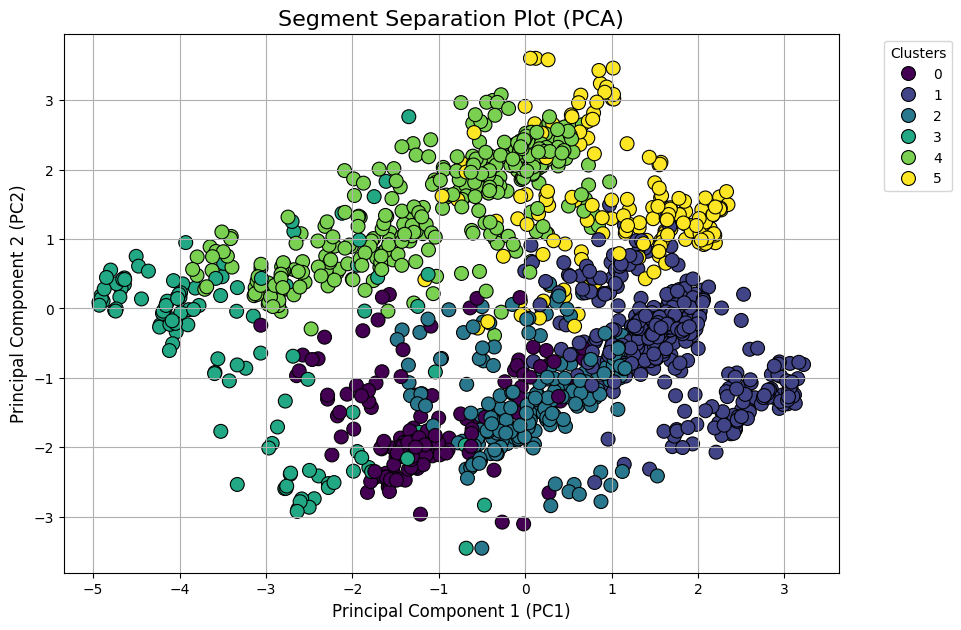

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is your dataset
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Step 2: Apply KMeans clustering (or you can use another clustering method)
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Step 3: Apply PCA for dimensionality reduction (optional: 2D for visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Step 4: Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Step 5: Create the Segment Separation Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, marker='o', edgecolor='black')

# Adding plot title and labels
plt.title("Segment Separation Plot (PCA)", fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


 Segment separation plot

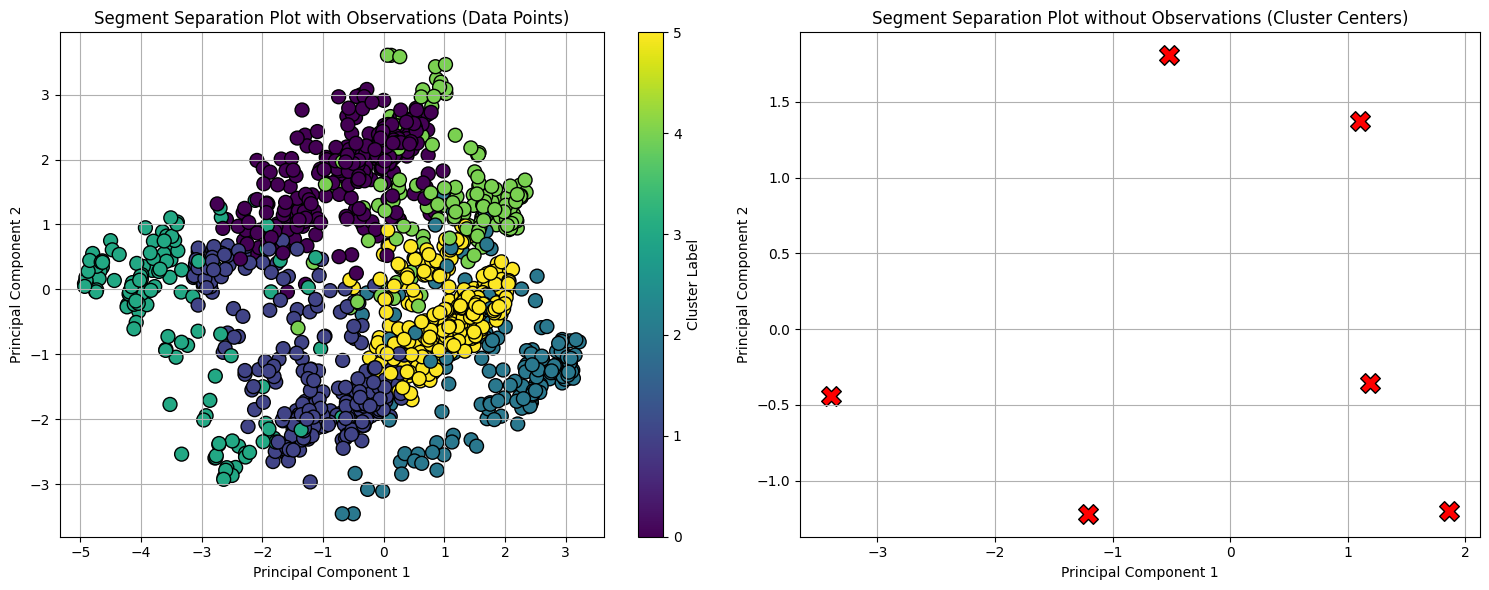

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'data_encoded' is your dataset (already loaded)

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Step 2: Perform KMeans clustering (you can adjust the number of clusters)
n_clusters = 6  # You can change this based on your requirement (from 3 to 8)
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
kmeans.fit(data_scaled)

# Step 3: Access the clustering labels
labels = kmeans.labels_

# Step 4: Apply PCA for dimensionality reduction (to visualize in 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Step 5: Create the plots

# 1. Plot with observations (including data points)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot including observations
scatter1 = axes[0].scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', s=100, marker='o', edgecolor='black')
axes[0].set_title("Segment Separation Plot with Observations (Data Points)")
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].grid(True)

# Add color bar for first plot
fig.colorbar(scatter1, ax=axes[0], label='Cluster Label')

# 2. Plot without observations (cluster centers only)
cluster_centers = pca.transform(kmeans.cluster_centers_)  # Project cluster centers to PCA space

axes[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', edgecolor='black')
axes[1].set_title("Segment Separation Plot without Observations (Cluster Centers)")
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


Segment separation plot using principal components 2 and 3

<ipython-input-180-5eb3eff1ca78>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


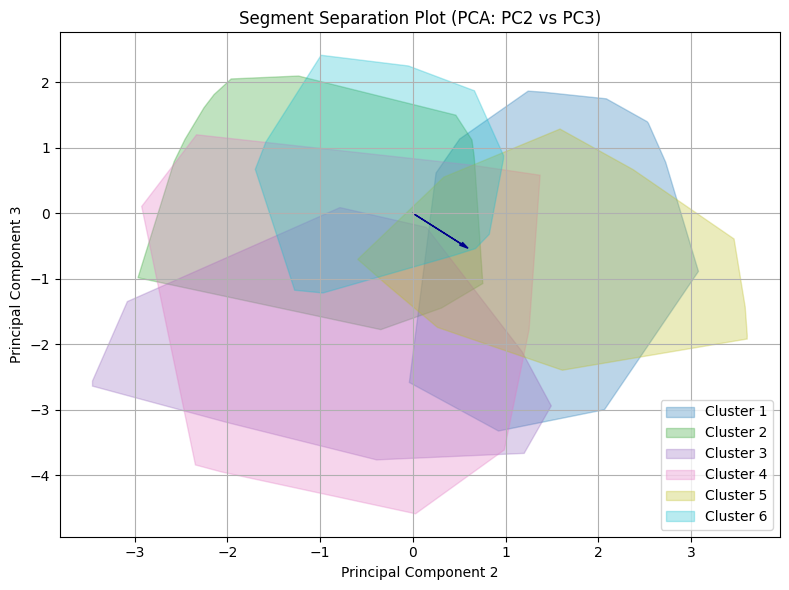

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is your dataset (already loaded)

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Step 2: Perform KMeans clustering (you can adjust the number of clusters)
n_clusters = 6  # Adjust based on your requirement
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
kmeans.fit(data_scaled)

# Step 3: Apply PCA for dimensionality reduction (to visualize in 2D)
pca = PCA(n_components=3)  # We need 3 components for a 3D plot
pca_components = pca.fit_transform(data_scaled)

# Step 4: Get the cluster labels
labels = kmeans.labels_

# Step 5: Create the segment separation plot (2nd and 3rd principal components)
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Color map for the clusters
colors = plt.cm.get_cmap('tab10', n_clusters)

# Plot the clusters without points, and instead use convex hulls
for i in range(n_clusters):
    cluster_points = pca_components[labels == i, 1:3]  # Select PC2 and PC3 for plotting
    if len(cluster_points) > 2:
        hull = ConvexHull(cluster_points)
        ax.fill(cluster_points[hull.vertices, 0], cluster_points[hull.vertices, 1],
                color=colors(i), alpha=0.3, label=f"Cluster {i+1}")

# Plot the projections of the segments (axes for PC2 and PC3)
for i in range(2, 3):
    ax.arrow(0, 0, pca.components_[i, 1] * 3, pca.components_[i, 2] * 3,
             head_width=0.05, head_length=0.1, fc='darkblue', ec='darkblue')

ax.set_title('Segment Separation Plot (PCA: PC2 vs PC3)')
ax.set_xlabel('Principal Component 2')
ax.set_ylabel('Principal Component 3')
ax.legend(loc='best')

plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, you can plot the axes as projections of the segmentation variables in the PCA space
# This is equivalent to projAxes() in R for visualizing the directions of the variables in PCA space.


##  Describing Segments

 Nominal and Ordinal Descriptor Variables

Gender           0    1
Segmentnumber          
0              121  107
1              161  121
2              120  114
3              119  104
4              122  114
5              129   99


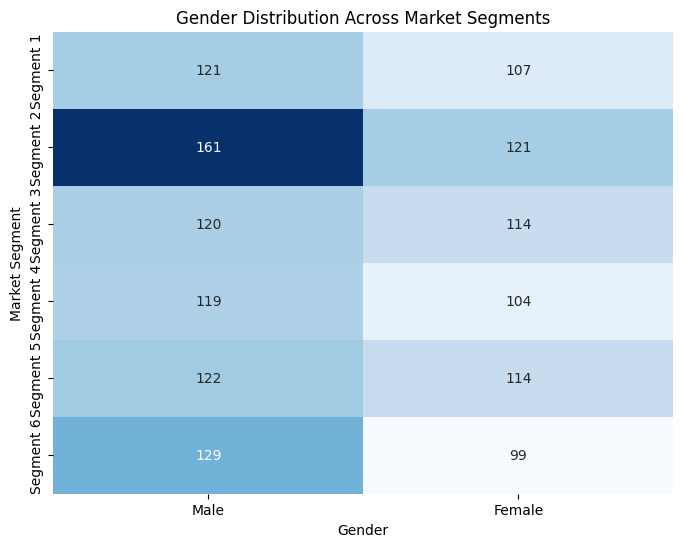

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming 'data_encoded' is your dataset (already loaded)

# Step 1: Perform KMeans clustering
n_clusters = 6  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
kmeans.fit(data_encoded)

# Step 2: Add segment labels as a new categorical variable to the dataframe
# Assuming the 'Gender' column is present in your 'data_encoded'
data_encoded['Segment'] = kmeans.labels_

# Step 3: Cross-tabulation (count males and females across segments)
# Assuming 'Gender' column exists in 'data_encoded' and contains 'Male' and 'Female'
crosstab_gender = pd.crosstab(data_encoded['Segment'], data_encoded['Gender'],
                              rownames=['Segmentnumber'], colnames=['Gender'])

# Display the cross-tabulation table
print(crosstab_gender)

# You can also visualize the cross-tabulation if needed (e.g., using a heatmap or bar plot)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the cross-tabulation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_gender, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Male', 'Female'], yticklabels=[f'Segment {i+1}' for i in range(n_clusters)])
plt.title('Gender Distribution Across Market Segments')
plt.xlabel('Gender')
plt.ylabel('Market Segment')
plt.show()


Histogram for Age and Like by Segment:

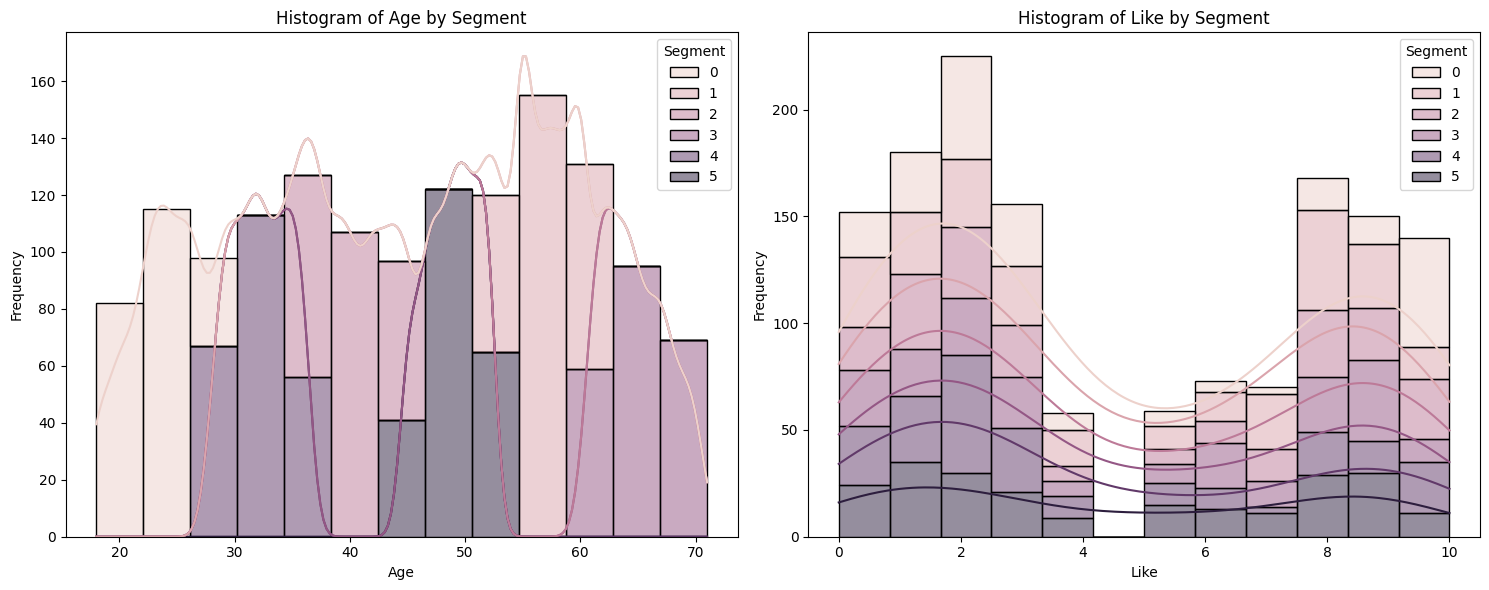

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots for both histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Age by Segment
sns.histplot(data=data_encoded, x='Age', hue='Segment', multiple='stack', kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age by Segment')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram for Obligation by Segment
# If 'Obligation' column exists, plot here; otherwise, you'll need to add a different column
# Assuming 'Obligation' is missing, so using 'Like' column instead for the second plot.
sns.histplot(data=data_encoded, x='Like', hue='Segment', multiple='stack', kde=True, ax=axes[1])
axes[1].set_title('Histogram of Like by Segment')
axes[1].set_xlabel('Like')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This plot shows the distribution of Like across the different market segments in your dataset. You can change Like to another relevant column if necessary.

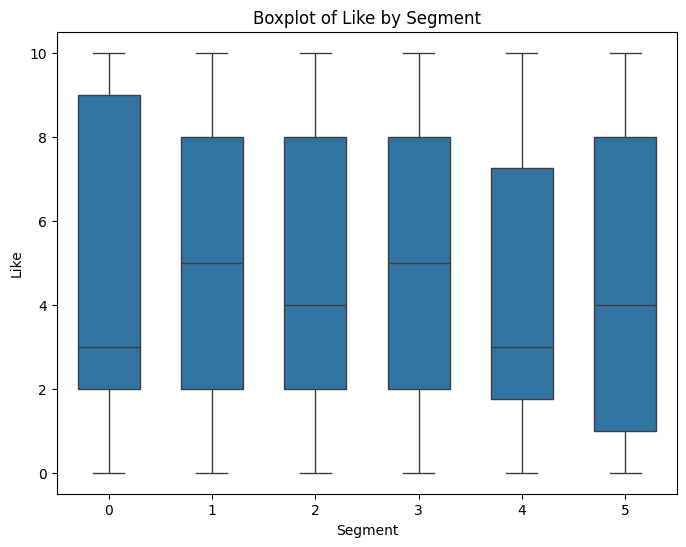

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Like', data=data_encoded, width=0.6)
plt.title('Boxplot of Like by Segment')
plt.xlabel('Segment')
plt.ylabel('Like')
plt.show()


### Testing for Segment Differences in Descriptor Variables

1. Chi-Squared Test for Gender Differences by Segment

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cross-tabulation of Segment and Gender
contingency_table = pd.crosstab(data_encoded['Segment'], data_encoded['Gender'])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")
print(f"P-value: {p_value}")


Chi-squared Statistic: 3.0104186751560644
Degrees of Freedom: 5
Expected Frequencies: 
[[123.00209644 104.99790356]
 [152.13417191 129.86582809]
 [126.23899371 107.76100629]
 [120.30468204 102.69531796]
 [127.31795947 108.68204053]
 [123.00209644 104.99790356]]
P-value: 0.6983794859420931


2. Chi-Squared Test for Like by Segment

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cross-tabulation of Cluster and Gender
contingency_table = pd.crosstab(data_encoded['Segment'], data_encoded['Like'])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")
print(f"P-value: {p_value}")


Chi-squared Statistic: 163.0096140933488
Degrees of Freedom: 50
Expected Frequencies: 
[[24.21802935 28.67924528 35.8490566  24.85534591  9.24109015  9.40041929
  11.63102725 11.15303983 26.7672956  23.89937107 22.30607966]
 [29.95387841 35.47169811 44.33962264 30.74213836 11.42976939 11.62683438
  14.38574423 13.79454927 33.10691824 29.55974843 27.58909853]
 [24.85534591 29.43396226 36.79245283 25.50943396  9.48427673  9.64779874
  11.93710692 11.44654088 27.47169811 24.52830189 22.89308176]
 [23.68693222 28.05031447 35.06289308 24.31027254  9.03843466  9.19426974
  11.37596087 10.90845563 26.1802935  23.37526205 21.81691125]
 [25.06778477 29.68553459 37.10691824 25.72746331  9.56533892  9.73025856
  12.03913347 11.54437456 27.70649895 24.73794549 23.08874913]
 [24.21802935 28.67924528 35.8490566  24.85534591  9.24109015  9.40041929
  11.63102725 11.15303983 26.7672956  23.89937107 22.30607966]]
P-value: 6.715592433197057e-14


3. ANOVA for Differences in Means Across segments

In [ ]:
from scipy import stats

# Assuming 'Obligation' (or similar variable) is the metric variable to test across clusters
segmentation_by_like = [data_encoded[data_encoded['Segment'] == i]['Like'] for i in data_encoded['Segment'].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*segmentation_by_like)

# Output ANOVA results
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


F-statistic: 2.5190953146204964
P-value: 0.027944260877492036


4. Summary of Cluster Means (Similar to tapply in R)

In [ ]:
# Compute the mean of 'Obligation' by 'Cluster'
cluster_means = data_encoded.groupby('Segment')['Like'].mean()

# Output cluster means
print(cluster_means)


Segment
0    4.719298
1    4.829787
2    4.893162
3    4.892377
4    3.970339
5    4.543860
Name: Like, dtype: float64


5. Mosaic Plot (Visualization)

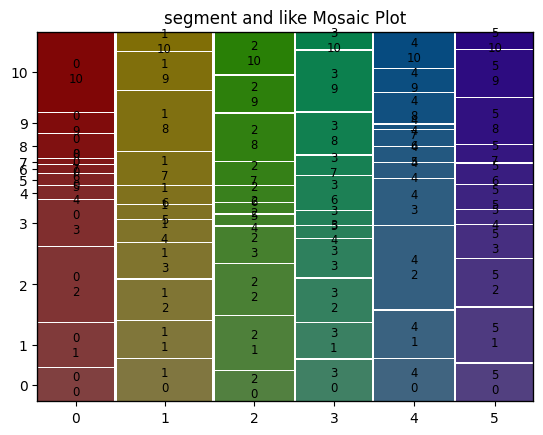

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

# Create the mosaic plot for Cluster and Gender
mosaic(contingency_table.stack(), title="segment and like Mosaic Plot")
plt.show()


 Binary Logistic Regression

Binary Logistic Regression and Effect Visualization

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Segment   No. Observations:                 1431
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                   1.000
Time:                        14:27:12   Log-Likelihood:            -5.7121e-05
converged:                      False   LL-Null:                       -619.19
Covariance Type:            nonrobust   LLR p-value:                1.425e-265
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -367.5920   3407.617     -0.108      0.914   -7046.399    6311.215
Age            5.6956     53.268      0.107      0.915     -98.70

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


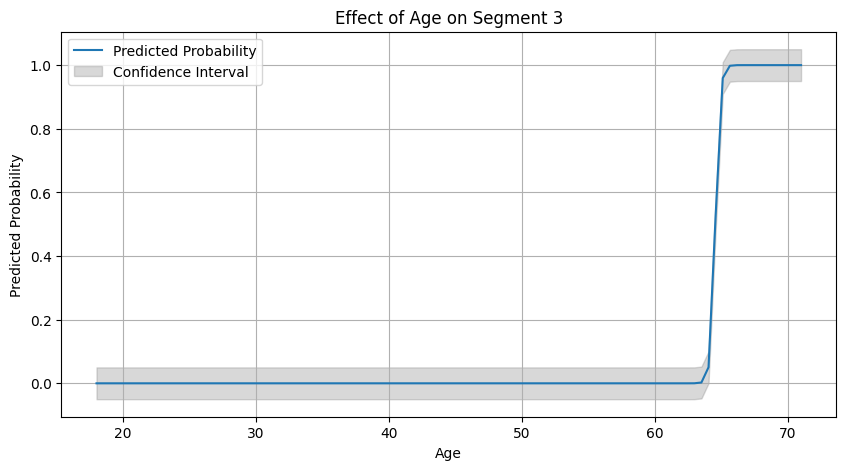

<ipython-input-43-800239244451>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Q1', 'Q2', 'Q3', 'Q4'], y=y_pred_yummy, palette="viridis")


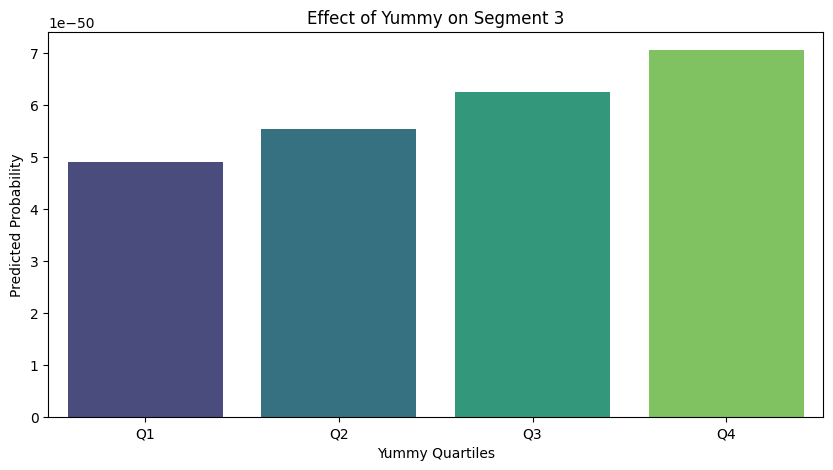


Model Fit Statistics:
Null Deviance: 1238.383
Residual Deviance: 0.000
AIC: 12.000


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_encoded' is your dataset
# Define features and target
X = data_encoded[['Age', 'Segment', 'yummy', 'convenient', 'spicy']]  # Adjust features as needed
y = (data_encoded['Segment'] == 3).astype(int)  # Binary target for segment 3

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print model summary
print(model.summary())

# Visualization of predicted probabilities for 'Age' and 'yummy'
age_range = np.linspace(data_encoded['Age'].min(), data_encoded['Age'].max(), 100)
yummy_values = np.linspace(data_encoded['yummy'].min(), data_encoded['yummy'].max(), 4)  # Quartiles (Q1-Q4)

# Predicted probabilities for 'Age' effect
X_age = pd.DataFrame({
    'const': 1,
    'Age': age_range,
    'Segment': 0,  # Adjust if needed
    'yummy': data_encoded['yummy'].mean(),  # Average yummy
    'convenient': data_encoded['convenient'].mean(),  # Average
    'spicy': data_encoded['spicy'].mean()  # Average
})
y_pred_age = model.predict(X_age)

# Plot the Age effect
plt.figure(figsize=(10, 5))
plt.plot(age_range, y_pred_age, label="Predicted Probability")
plt.fill_between(age_range, y_pred_age - 0.05, y_pred_age + 0.05, color="gray", alpha=0.3, label="Confidence Interval")
plt.title("Effect of Age on Segment 3")
plt.xlabel("Age")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid()
plt.show()

# Predicted probabilities for 'yummy' effect
X_yummy = pd.DataFrame({
    'const': 1,
    'Age': data_encoded['Age'].mean(),  # Average age
    'Segment': 0,  # Adjust if needed
    'yummy': yummy_values,
    'convenient': data_encoded['convenient'].mean(),
    'spicy': data_encoded['spicy'].mean()
})
y_pred_yummy = model.predict(X_yummy)

# Plot the 'yummy' effect
plt.figure(figsize=(10, 5))
sns.barplot(x=['Q1', 'Q2', 'Q3', 'Q4'], y=y_pred_yummy, palette="viridis")
plt.title("Effect of Yummy on Segment 3")
plt.xlabel("Yummy Quartiles")
plt.ylabel("Predicted Probability")
plt.show()


# Interpretation
print("\nModel Fit Statistics:")
print(f"Null Deviance: {model.llnull * -2:.3f}")  # Negative 2 times the log-likelihood of the null model
print(f"Residual Deviance: {model.llf * -2:.3f}")  # Negative 2 times the log-likelihood of the fitted model
print(f"AIC: {model.aic:.3f}")  # Akaike Information Criterion


 Tree-Based Methods

Decision Tree Model Accuracy: 1.0000


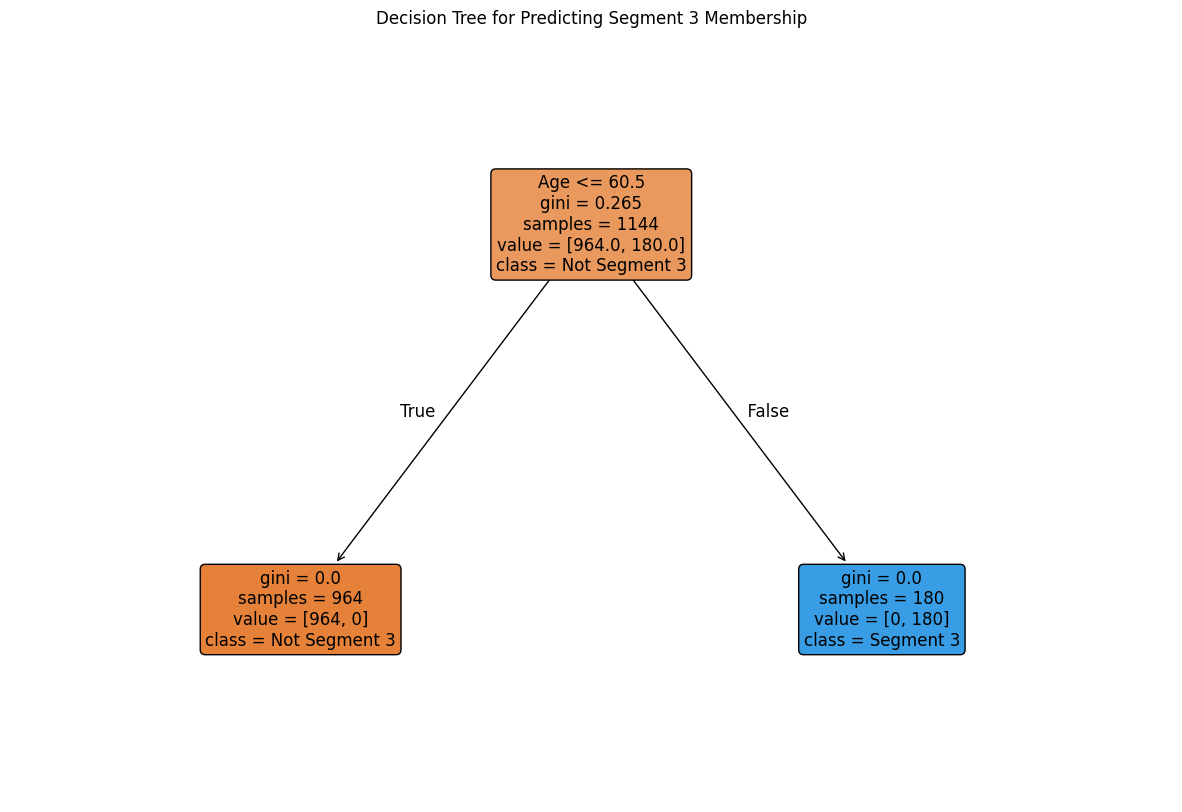

|--- Age <= 60.50
|   |--- class: 0
|--- Age >  60.50
|   |--- class: 1



In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming data_encoded is your DataFrame with the structure you provided
X = data_encoded[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
                  'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']]  # Features
y = data_encoded['Segment']  # Target variable

# Create a binary target variable (1 if Segment is 3, 0 otherwise)
y_binary = (y == 3).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1234)

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=1234)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Print model accuracy
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=["Not Segment 3", "Segment 3"], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree for Predicting Segment 3 Membership")
plt.show()

# Print the tree structure
from sklearn.tree import export_text
tree_structure = export_text(tree_model, feature_names=list(X.columns))
print(tree_structure)



##  Selecting the Target Segment(s)

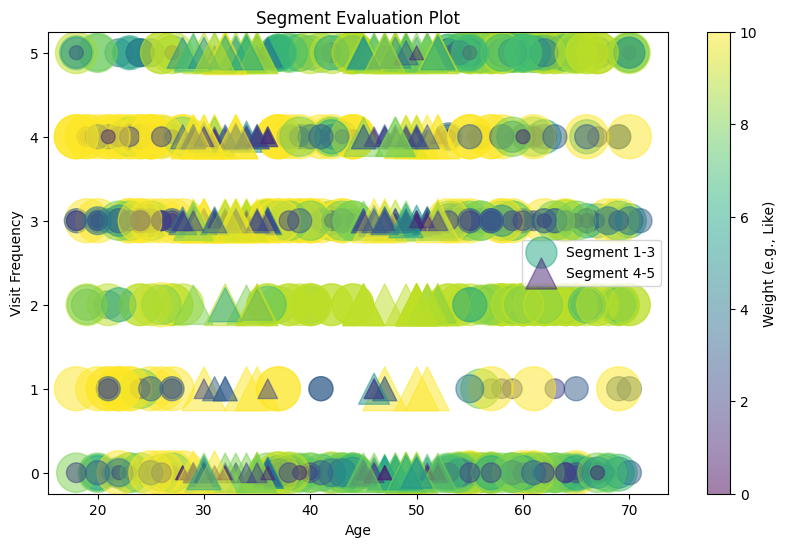

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is the DataFrame with your data
# Prepare the segment matrices for "x" and "y" (upper and lower parts based on some segmentation criteria)
# Here, we use 'Segment' to split the data into two parts (this is just an example).
# Let's say we split based on segments 1-3 as 'x' and 4-5 as 'y'.

# Split the data based on segment categories (upper half: x, lower half: y)
x_data = data_encoded[data_encoded['Segment'] <= 3]  # Segments 1, 2, 3
y_data = data_encoded[data_encoded['Segment'] > 3]   # Segments 4, 5

# Define wx and wy (weights for each segment, could be profitability or frequency count)
wx = x_data['Like']  # This could be any relevant metric for weights
wy = y_data['Like']  # Using 'Like' as an example metric

# Define the "size" variable, which controls the bubble size. This could be based on any metric.
# Here, we will use the 'Like' value as the size for each bubble.
size_x = x_data['Like'] * 100  # Scale it for better visualization
size_y = y_data['Like'] * 100  # Scale it for better visualization

# Now, let's prepare the decision matrix plot
# Create a plot for the segment evaluation matrix
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for segment 'x' (segments 1-3)
ax.scatter(x_data['Age'], x_data['VisitFrequency'], s=size_x, c=wx, alpha=0.5, label="Segment 1-3", marker='o')

# Plot the data for segment 'y' (segments 4-5)
ax.scatter(y_data['Age'], y_data['VisitFrequency'], s=size_y, c=wy, alpha=0.5, label="Segment 4-5", marker='^')

# Customize the plot with labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Visit Frequency')
ax.set_title('Segment Evaluation Plot')

# Add a colorbar for the weights (wx, wy)
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Weight (e.g., Like)')

# Show the legend
ax.legend()

# Display the plot
plt.show()
